In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
data = pd.read_csv('/content/META.csv')

In [ ]:
data

Date        Open        High         Low       Close   Adj Close  \
0     2018-01-03  181.880005  184.779999  181.330002  184.669998  184.669998   
1     2018-01-04  184.899994  186.210007  184.100006  184.330002  184.330002   
2     2018-01-05  185.589996  186.899994  184.929993  186.850006  186.850006   
3     2018-01-08  187.199997  188.899994  186.330002  188.279999  188.279999   
4     2018-01-09  188.699997  188.800003  187.100006  187.869995  187.869995   
...          ...         ...         ...         ...         ...         ...   
1504  2023-12-26  354.989990  356.980011  353.450012  354.829987  354.829987   
1505  2023-12-27  356.070007  359.000000  355.309998  357.829987  357.829987   
1506  2023-12-28  359.700012  361.899994  357.809998  358.320007  358.320007   
1507  2023-12-29  358.989990  360.000000  351.820007  353.959991  353.959991   
1508  2024-01-02  351.320007  353.160004  340.010010  346.290009  346.290009   

        Volume  
0     16886600  
1     13880900  
2     13574500  
3     17994700  
4     12393100  
...        ...  
1504   9898600  
1505  13207900  
1506  11798800  
1507  14980500  
1508  19021900  

[1509 rows x 7 columns]

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [ ]:
print("Data Head:\n", data.head())
print("\nData Information:\n")
data.info()
print("\nSummary Statistics:\n", data.describe())

Data Head:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-03  181.880005  184.779999  181.330002  184.669998  184.669998   
2018-01-04  184.899994  186.210007  184.100006  184.330002  184.330002   
2018-01-05  185.589996  186.899994  184.929993  186.850006  186.850006   
2018-01-08  187.199997  188.899994  186.330002  188.279999  188.279999   
2018-01-09  188.699997  188.800003  187.100006  187.869995  187.869995   

              Volume  
Date                  
2018-01-03  16886600  
2018-01-04  13880900  
2018-01-05  13574500  
2018-01-08  17994700  
2018-01-09  12393100  

Data Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2018-01-03 to 2024-01-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1509 non-null   float64
 1   High       1509 non-null   float64
 2  

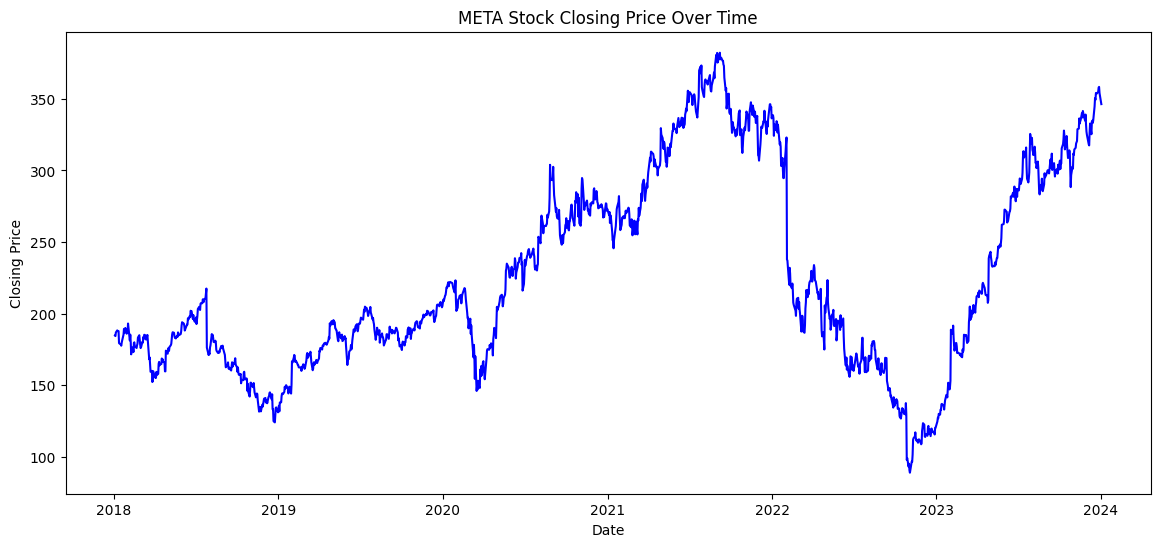

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], color='blue')
plt.title('META Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

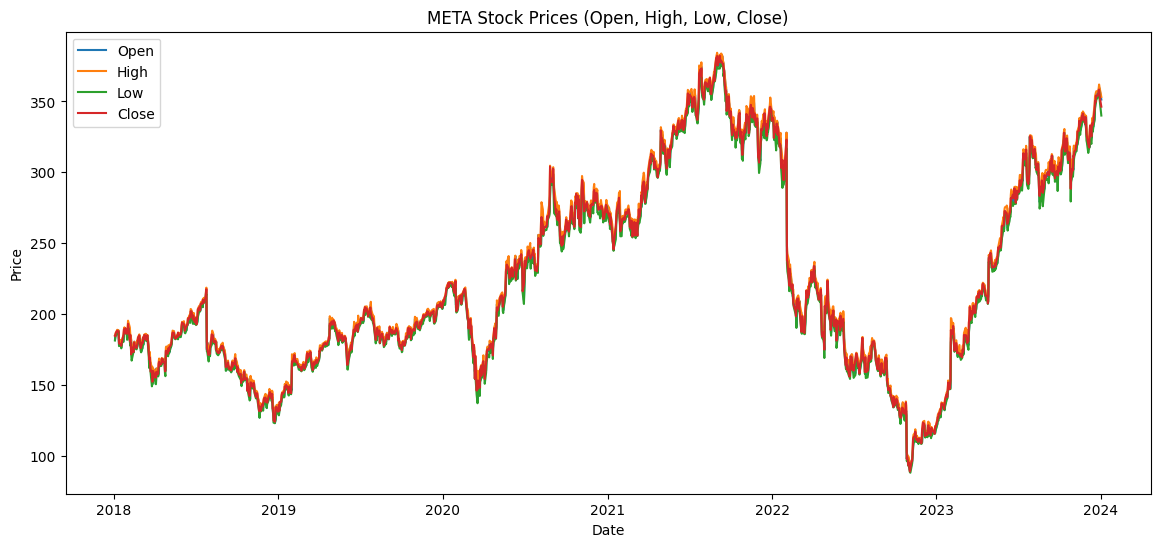

In [ ]:
plt.figure(figsize=(14, 6))
for column in ['Open', 'High', 'Low', 'Close']:
    plt.plot(data[column], label=column)
plt.title('META Stock Prices (Open, High, Low, Close)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
data['SMA_30'] = data['Close'].rolling(window=30).mean()  # 30-day Simple Moving Average
data['SMA_90'] = data['Close'].rolling(window=90).mean()

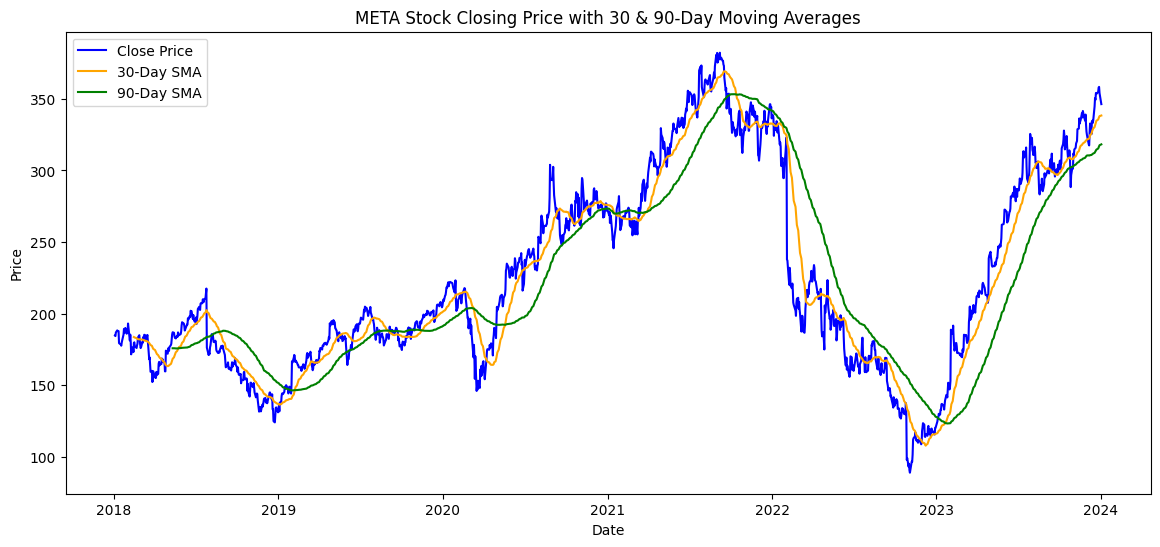

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_30'], label='30-Day SMA', color='orange')
plt.plot(data['SMA_90'], label='90-Day SMA', color='green')
plt.title('META Stock Closing Price with 30 & 90-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
data['Daily_Return'] = data['Close'].pct_change()

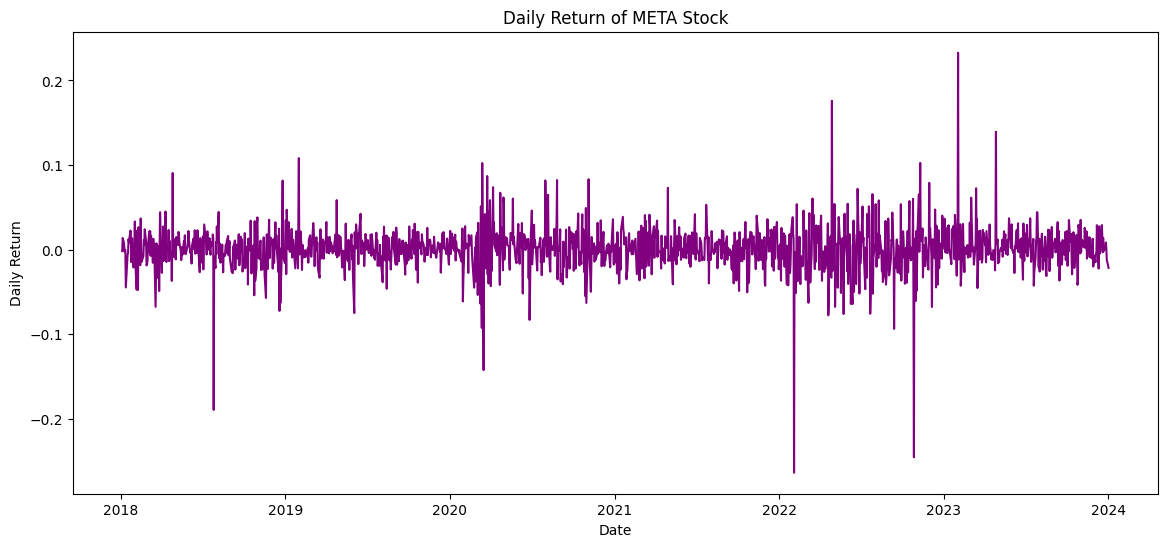

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data['Daily_Return'], color='purple')
plt.title('Daily Return of META Stock')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [ ]:
rolling_window = 30  # Rolling 30-day window
data['Rolling_Volatility'] = data['Daily_Return'].rolling(window=rolling_window).std()

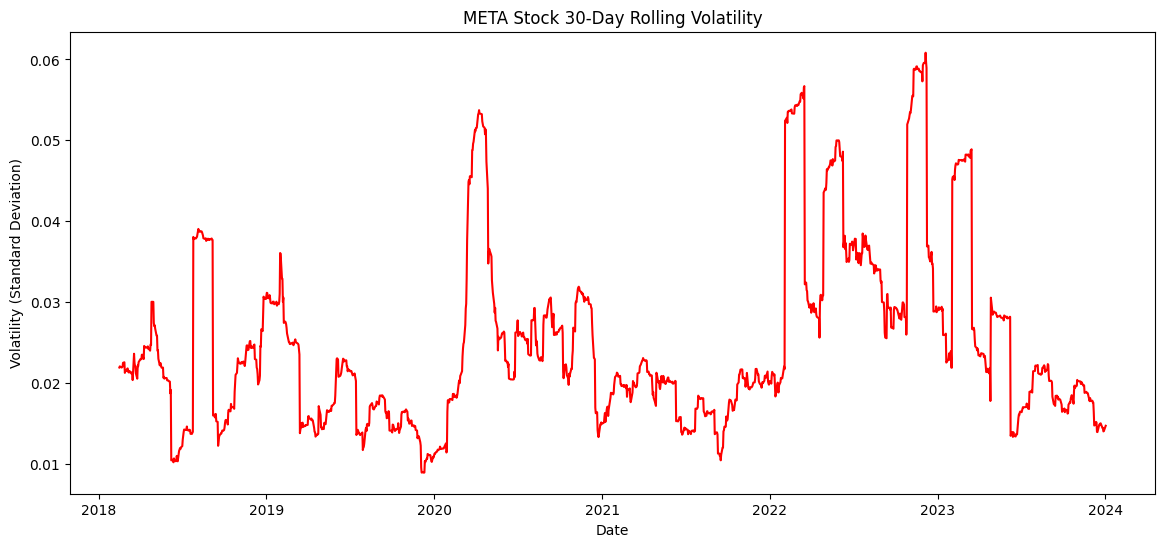

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data['Rolling_Volatility'], color='red')
plt.title(f'META Stock 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.show()

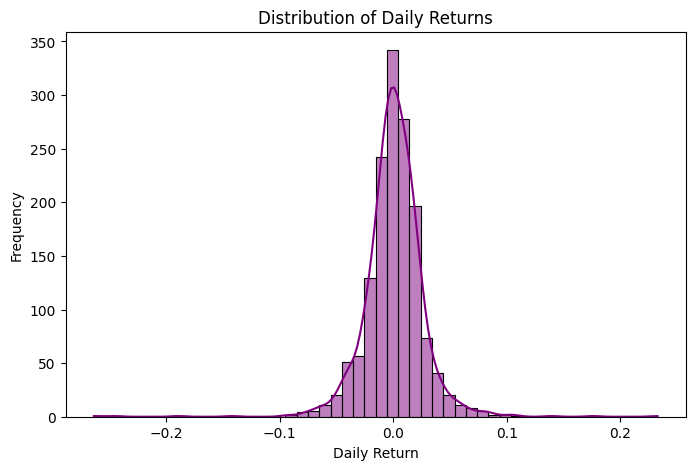

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Daily_Return'].dropna(), bins=50, color='purple', kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

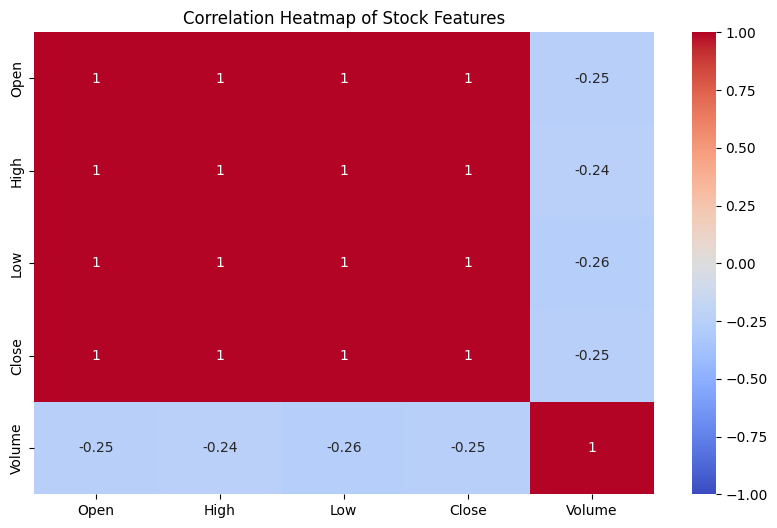

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Stock Features')
plt.show()

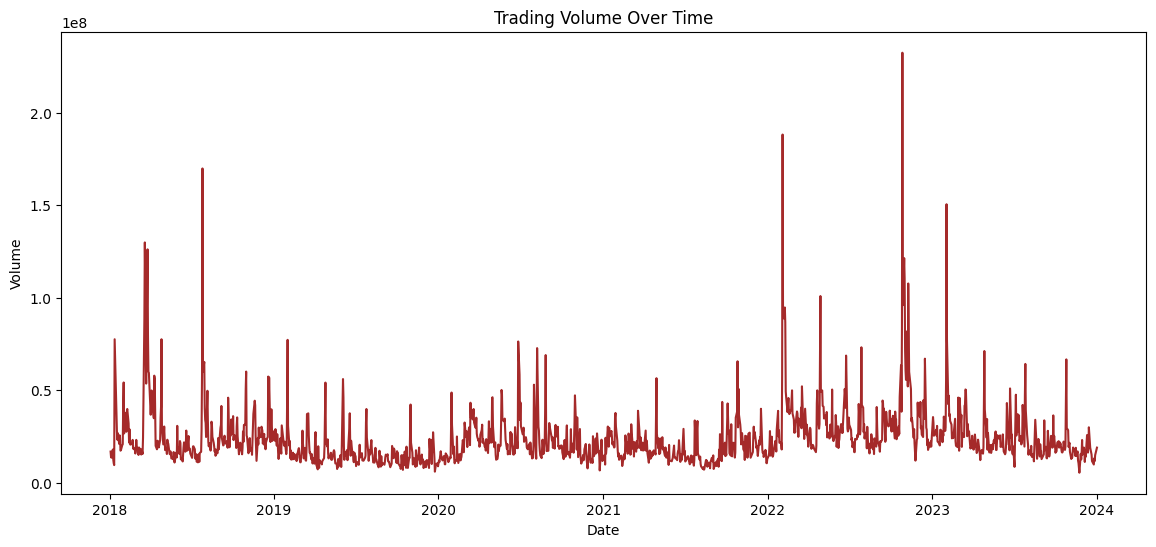

In [ ]:
# Volume Analysis
plt.figure(figsize=(14, 6))
plt.plot(data['Volume'], color='brown')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


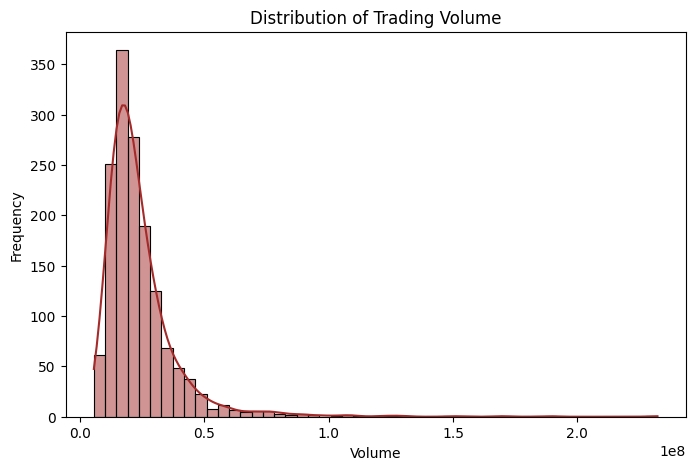

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Volume'], bins=50, color='brown', kde=True)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

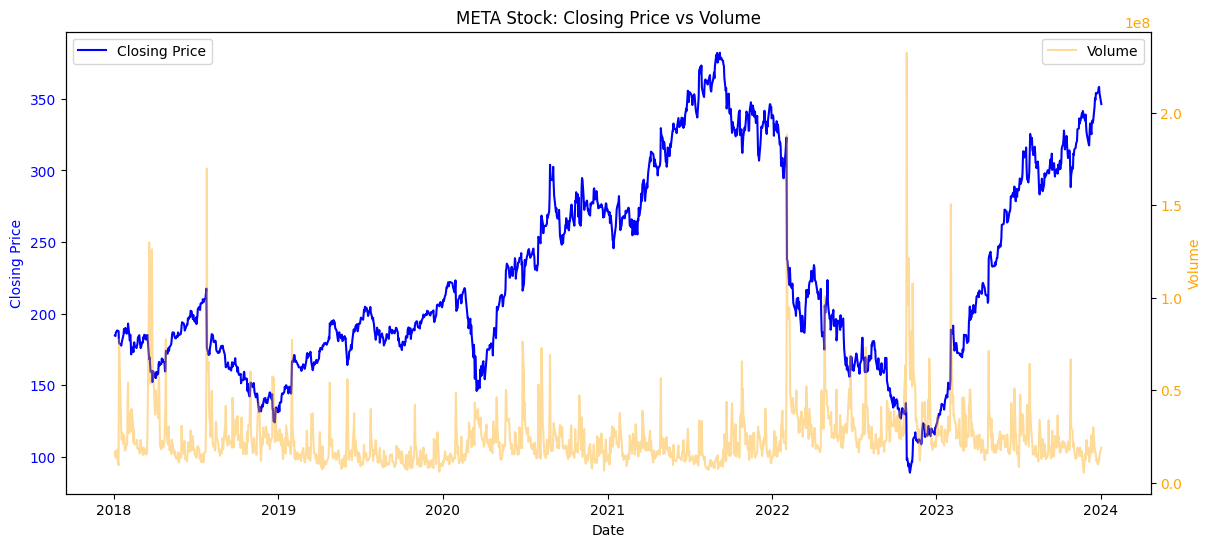

In [ ]:
# Plot Closing Price and Volume on a single plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot 'Close' on the primary y-axis
ax1.plot(data.index, data['Close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('META Stock: Closing Price vs Volume')

# Create secondary y-axis for 'Volume'
ax2 = ax1.twinx()
ax2.plot(data.index, data['Volume'], color='orange', label='Volume', alpha=0.4)
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legends for clarity
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [ ]:
X = data.drop(['Close'], axis=1)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

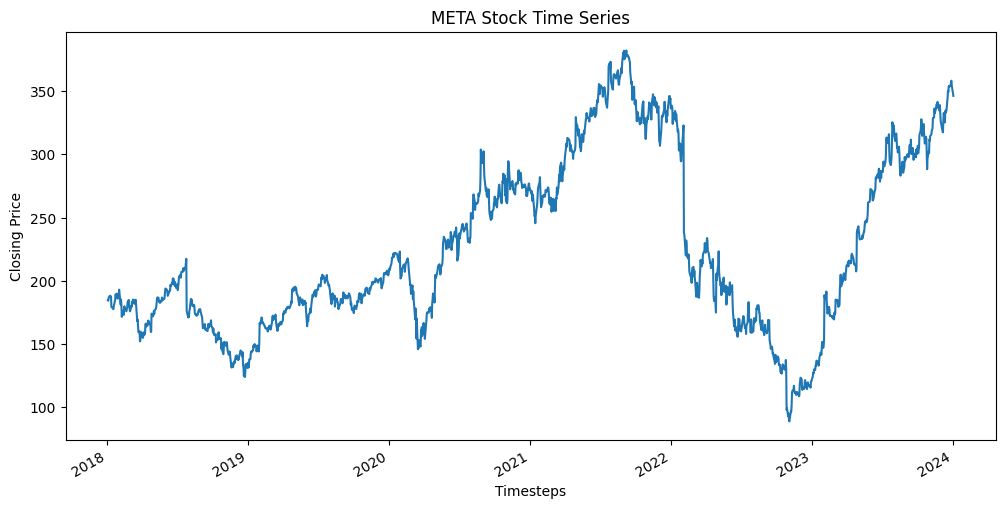

In [ ]:
time_series.plot(figsize=(12,6))
plt.title('META Stock Time Series')
plt.xlabel('Timesteps')
plt.ylabel('Closing Price')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, StackingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('/content/META.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Step 1: Prepare univariate dataset by creating lagged features of 'Close'
# Define the number of lags (e.g., use 3 past values to predict the next one)
n_lags = 100
for i in range(1, n_lags + 1):
    data[f'lag_{i}'] = data['Close'].shift(i)

# Drop rows with NaN values due to lagging
data = data.dropna()

# Use lagged values as predictors and 'Close' as the target
X = data[[f'lag_{i}' for i in range(1, n_lags + 1)]]
y = data['Close']

# Split the dataset into train and test (no shuffle to preserve time series order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Custom base estimator for Dagging
class DaggingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        # Split the data using KFold for Dagging
        kf = KFold(n_splits=self.n_estimators, shuffle=True, random_state=42)
        for train_index, _ in kf.split(X):
            model = self.base_estimator.fit(X.iloc[train_index], y.iloc[train_index])
            self.models.append(model)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict(X)
        return np.mean(predictions, axis=1)

# Step 2: Implement Different Ensemble Models with Data Diversity

# 1. Bagging using Decision Tree
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=10,
    random_state=42,
    bootstrap=True,
    max_samples=0.8
)

# 2. Boosting using AdaBoost with Decision Tree as base estimator
boosting_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=10,
    random_state=42
)

# 3. Stacking: Meta-learner using Linear Regression
stacking_model = StackingRegressor(
    estimators=[
        ('bagging', bagging_model),
        ('boosting', boosting_model),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    ],
    final_estimator=LinearRegression(),
    passthrough=False
)

# 4. Dagging using a custom implementation
dagging_model = DaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=5
)

# Step 3: Train Each Ensemble Model
print("Training Bagging model (with bootstrap sampling)...")
bagging_model.fit(X_train, y_train)

print("Training Boosting model (sequential learning)...")
boosting_model.fit(X_train, y_train)

print("Training Stacking model (using base learner predictions)...")
stacking_model.fit(X_train, y_train)

print("Training Dagging model (with k-fold splits)...")
dagging_model.fit(X_train, y_train)

# Step 4: Make Predictions from Each Model
print("Making predictions...")
bagging_pred = bagging_model.predict(X_test)
boosting_pred = boosting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)
dagging_pred = dagging_model.predict(X_test)

# Step 5: Combine Predictions for Meta-Learner Aggregation
combined_predictions = np.column_stack((bagging_pred, boosting_pred, stacking_pred, dagging_pred))

# Final Meta-Learner: Linear Regression to aggregate predictions
meta_learner = LinearRegression().fit(combined_predictions, y_test)

# Final prediction
final_pred = meta_learner.predict(combined_predictions)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, final_pred)
print(f"Mean Squared Error: {mse}")

Training Bagging model (with bootstrap sampling)...
Training Boosting model (sequential learning)...
Training Stacking model (using base learner predictions)...
Training Dagging model (with k-fold splits)...
Making predictions...
Mean Squared Error: 53.40703558635563



Training Metrics:
                 MSE       MAE  R-Squared  sMAPE (%)  Directional Accuracy (%)
Bagging    24.956553  3.676457   0.994465   1.740503                 61.190053
Boosting   59.885865  6.021611   0.986718   2.828050                 52.397869
Stacking   53.388385  5.585264   0.988159   2.525579                 66.518650
Dagging   117.666457  8.297427   0.973903   4.022965                 54.529307
Melding    33.863375  4.319085   0.992490   2.121969                 60.568384


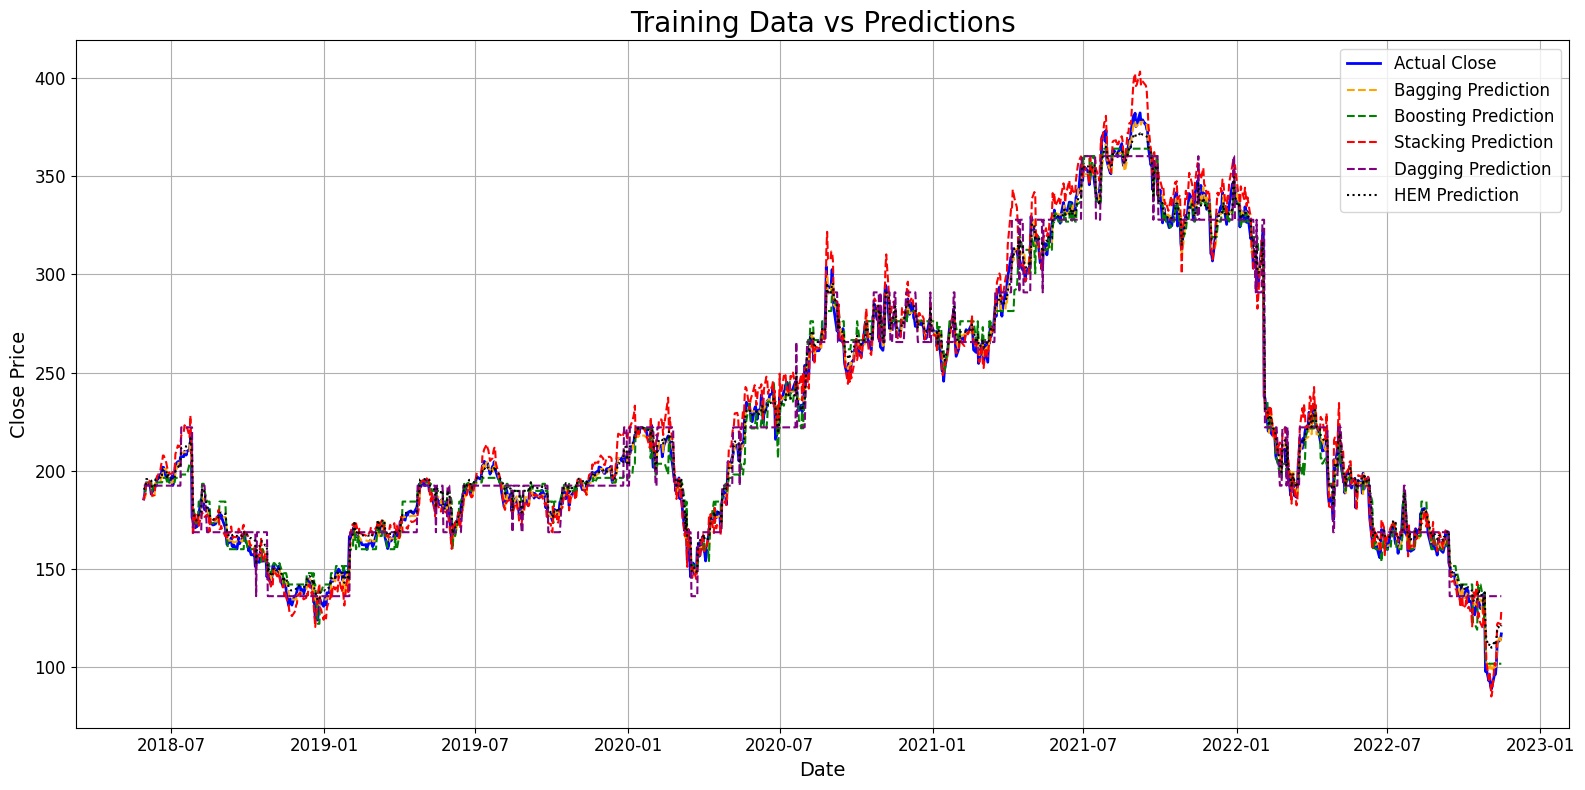

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Directional Accuracy (DA)
def directional_accuracy(y_true, y_pred):
    actual_direction = np.sign(y_true[1:] - y_true[:-1])  # Sign of actual change
    predicted_direction = np.sign(y_pred[1:] - y_true[:-1])  # Sign of predicted change
    return np.mean(actual_direction == predicted_direction) * 100  # Percentage

# Function to calculate Symmetric MAPE (sMAPE)
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Make predictions on the training set for evaluation
train_bagging_pred = bagging_model.predict(X_train)
train_boosting_pred = boosting_model.predict(X_train)
train_stacking_pred = stacking_model.predict(X_train)
train_dagging_pred = dagging_model.predict(X_train)
train_meta_pred = meta_learner.predict(np.column_stack((train_bagging_pred, train_boosting_pred, train_stacking_pred, train_dagging_pred)))

# Create a DataFrame to hold training predictions
train_forecast_df = pd.DataFrame({
    'Actual': y_train,
    'Bagging': train_bagging_pred,
    'Boosting': train_boosting_pred,
    'Stacking': train_stacking_pred,
    'Dagging': train_dagging_pred,
    'Melding': train_meta_pred  # Meta predictions
}, index=X_train.index)

# Calculate Evaluation Metrics
metrics = {}

for model_name, predictions in zip(
    ['Bagging', 'Boosting', 'Stacking', 'Dagging', 'Melding'],
    [train_bagging_pred, train_boosting_pred, train_stacking_pred, train_dagging_pred, train_meta_pred]
):
    mse = mean_squared_error(y_train, predictions)
    mae = mean_absolute_error(y_train, predictions)
    r2 = r2_score(y_train, predictions)
    smape_value = smape(y_train, predictions)
    da = directional_accuracy(y_train.values, predictions)

    metrics[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R-Squared': r2,
        'sMAPE (%)': smape_value,
        'Directional Accuracy (%)': da
        }

# Convert metrics dictionary to DataFrame for better readability
metrics_df = pd.DataFrame(metrics).T

# Print metrics
print("\nTraining Metrics:")
print(metrics_df)

# Plot the training data and predictions
plt.figure(figsize=(16, 8))

# Plot actual training values
plt.plot(train_forecast_df.index, train_forecast_df['Actual'], label='Actual Close', color='blue', linewidth=2)

# Plot predictions from each model
plt.plot(train_forecast_df.index, train_forecast_df['Bagging'], label='Bagging Prediction', color='orange', linestyle='--')
plt.plot(train_forecast_df.index, train_forecast_df['Boosting'], label='Boosting Prediction', color='green', linestyle='--')
plt.plot(train_forecast_df.index, train_forecast_df['Stacking'], label='Stacking Prediction', color='red', linestyle='--')
plt.plot(train_forecast_df.index, train_forecast_df['Dagging'], label='Dagging Prediction', color='purple', linestyle='--')
plt.plot(train_forecast_df.index, train_forecast_df['Melding'], label='HEM Prediction', color='black', linestyle=':')

# Title and labels
plt.title('Training Data vs Predictions', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


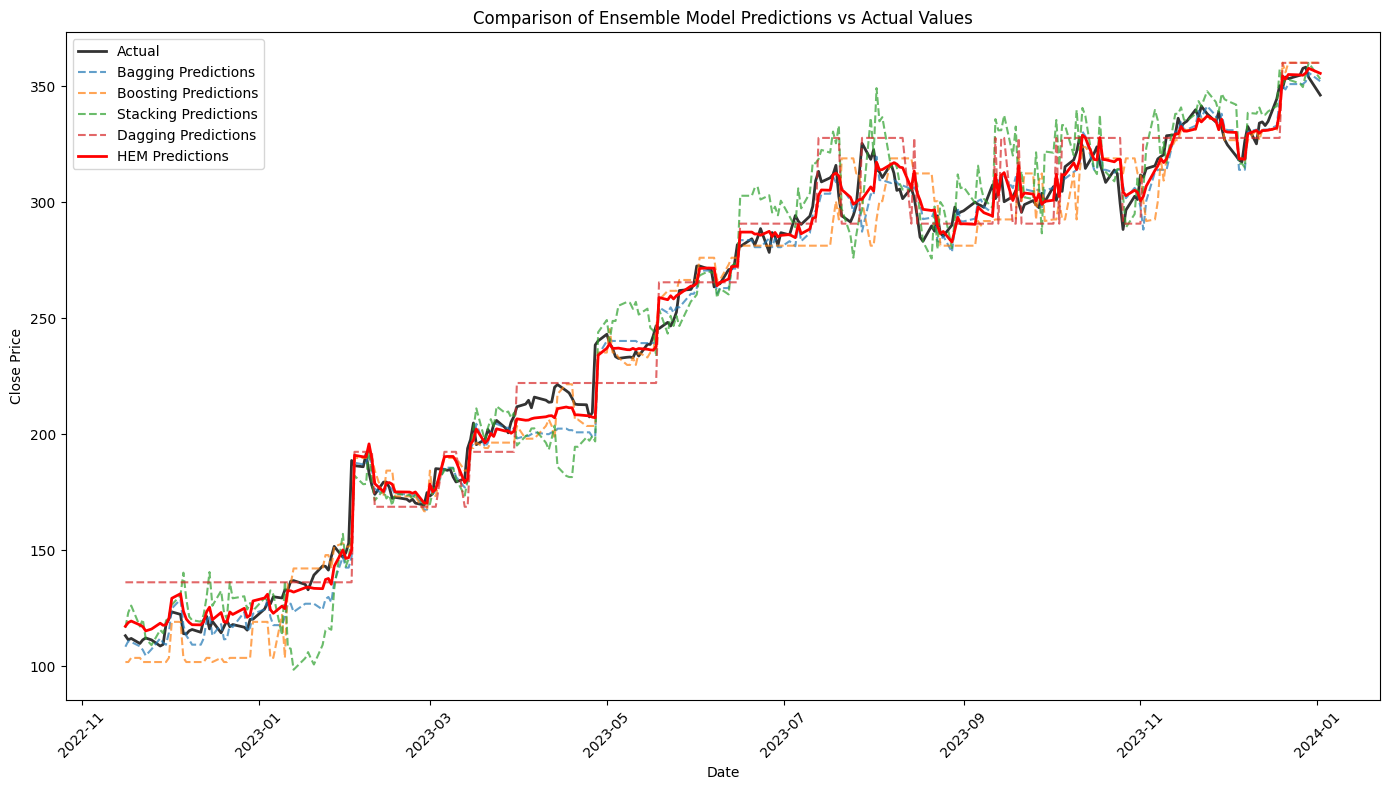

In [ ]:
import matplotlib.pyplot as plt

# Step 7: Plot the Results

# Create a figure to compare predictions of all models
plt.figure(figsize=(14, 8))

# Plot actual values
plt.plot(y_test.index, y_test, label="Actual", color='black', linewidth=2, alpha=0.8)

# Plot predictions from individual models
plt.plot(y_test.index, bagging_pred, label="Bagging Predictions", linestyle='--', alpha=0.7)
plt.plot(y_test.index, boosting_pred, label="Boosting Predictions", linestyle='--', alpha=0.7)
plt.plot(y_test.index, stacking_pred, label="Stacking Predictions", linestyle='--', alpha=0.7)
plt.plot(y_test.index, dagging_pred, label="Dagging Predictions", linestyle='--', alpha=0.7)

# Plot final meta-learner's predictions (combined predictions)
plt.plot(y_test.index, final_pred, label="HEM Predictions", color='red', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('Comparison of Ensemble Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Evaluation metrics for Bagging Model:
  Mean Squared Error (MSE): 75.7402
  Mean Absolute Error (MAE): 6.5261
  R-Squared (R²): 0.9865
  Symmetric Mean Absolute Percentage Error (sMAPE): 3.01%
  Directional Accuracy (DA): 44.84%

Evaluation metrics for Boosting Model:
  Mean Squared Error (MSE): 149.2963
  Mean Absolute Error (MAE): 9.5707
  R-Squared (R²): 0.9735
  Symmetric Mean Absolute Percentage Error (sMAPE): 4.51%
  Directional Accuracy (DA): 46.26%

Evaluation metrics for Stacking Model:
  Mean Squared Error (MSE): 213.0199
  Mean Absolute Error (MAE): 11.1540
  R-Squared (R²): 0.9621
  Symmetric Mean Absolute Percentage Error (sMAPE): 5.21%
  Directional Accuracy (DA): 50.89%

Evaluation metrics for Dagging Model:
  Mean Squared Error (MSE): 171.9218
  Mean Absolute Error (MAE): 10.8314
  R-Squared (R²): 0.9694
  Symmetric Mean Absolute Percentage Error (sMAPE): 5.24%
  Directional Accuracy (DA): 48.75%

Evaluation metrics for Melding Model (HEM):
  Mean Squared Error (MSE): 5

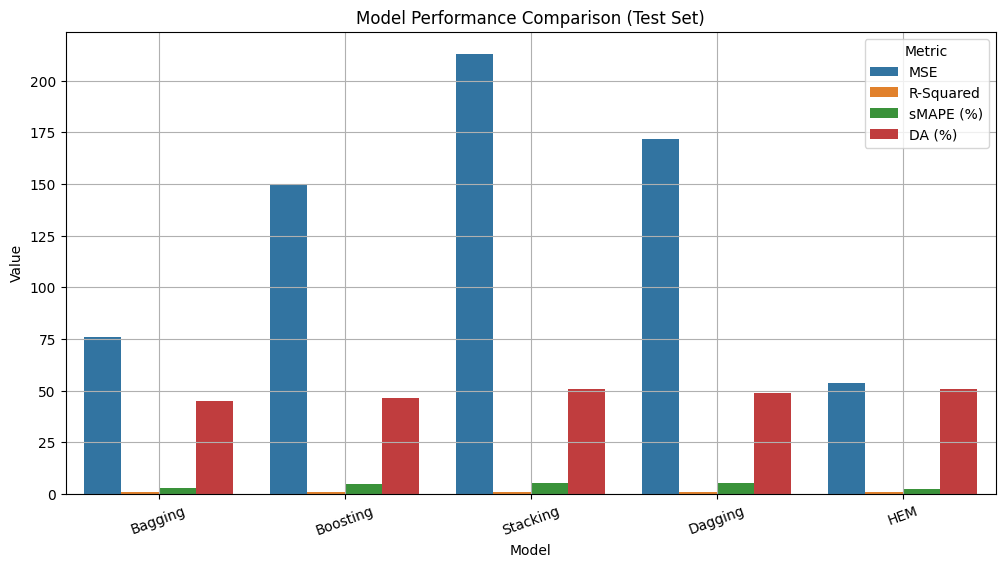

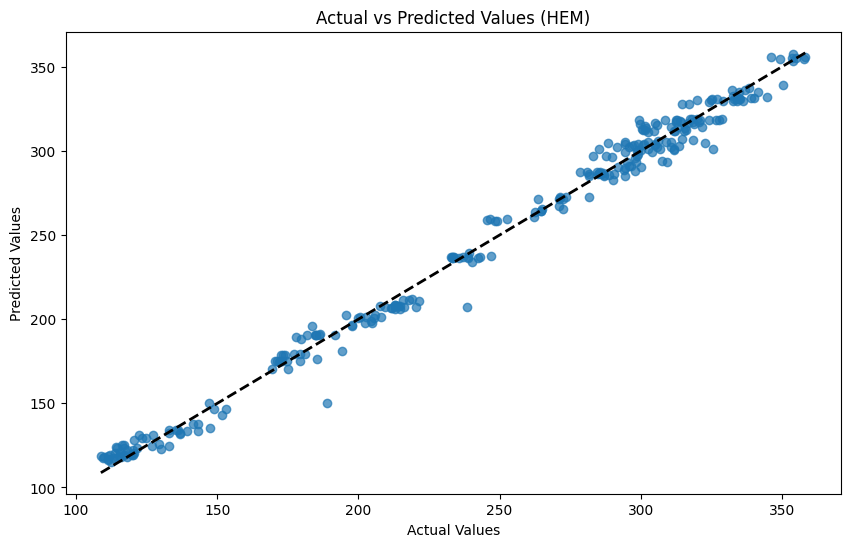

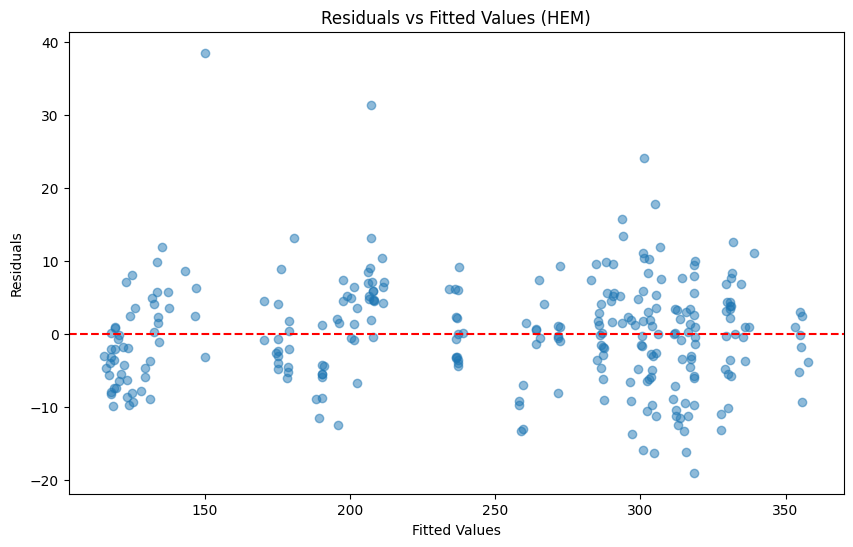

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Directional Accuracy (DA)
def directional_accuracy(y_true, y_pred):
    actual_direction = np.sign(y_true[1:] - y_true[:-1])  # Sign of actual change
    predicted_direction = np.sign(y_pred[1:] - y_true[:-1])  # Sign of predicted change
    return np.mean(actual_direction == predicted_direction) * 100  # Percentage

# Function to calculate Symmetric MAPE (sMAPE)
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Function to evaluate model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    smape_value = smape(y_true, y_pred)
    da = directional_accuracy(y_true.values, y_pred)

    print(f"Evaluation metrics for {model_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-Squared (R²): {r2:.4f}")
    print(f"  Symmetric Mean Absolute Percentage Error (sMAPE): {smape_value:.2f}%")
    print(f"  Directional Accuracy (DA): {da:.2f}%\n")

    return mse, mae, r2, smape_value, da

# Evaluate each individual model
mse_bagging, mae_bagging, r2_bagging, smape_bagging, da_bagging = evaluate_model(y_test, bagging_pred, "Bagging Model")
mse_boosting, mae_boosting, r2_boosting, smape_boosting, da_boosting = evaluate_model(y_test, boosting_pred, "Boosting Model")
mse_stacking, mae_stacking, r2_stacking, smape_stacking, da_stacking = evaluate_model(y_test, stacking_pred, "Stacking Model")
mse_dagging, mae_dagging, r2_dagging, smape_dagging, da_dagging = evaluate_model(y_test, dagging_pred, "Dagging Model")
mse_meta, mae_meta, r2_meta, smape_meta, da_meta = evaluate_model(y_test, final_pred, "Melding Model (HEM)")

# Visualization of Evaluation Metrics
metrics = {
    'Model': ['Bagging', 'Boosting', 'Stacking', 'Dagging', 'HEM'],
    'MSE': [mse_bagging, mse_boosting, mse_stacking, mse_dagging, mse_meta],
    'R-Squared': [r2_bagging, r2_boosting, r2_stacking, r2_dagging, r2_meta],
    'sMAPE (%)': [smape_bagging, smape_boosting, smape_stacking, smape_dagging, smape_meta],
    'DA (%)': [da_bagging, da_boosting, da_stacking, da_dagging, da_meta]
}

metrics_df = pd.DataFrame(metrics)

# Melt the DataFrame for seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_melted, x='Model', y='Value', hue='Metric')
plt.title('Model Performance Comparison (Test Set)')
plt.ylabel('Value')
plt.xticks(rotation=20)
plt.legend(title="Metric", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

# Actual vs Predicted Plot for the Meta-Learner
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Values (HEM)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residuals vs Fitted Plot
residuals = y_test - final_pred
plt.figure(figsize=(10, 6))
plt.scatter(final_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (HEM)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


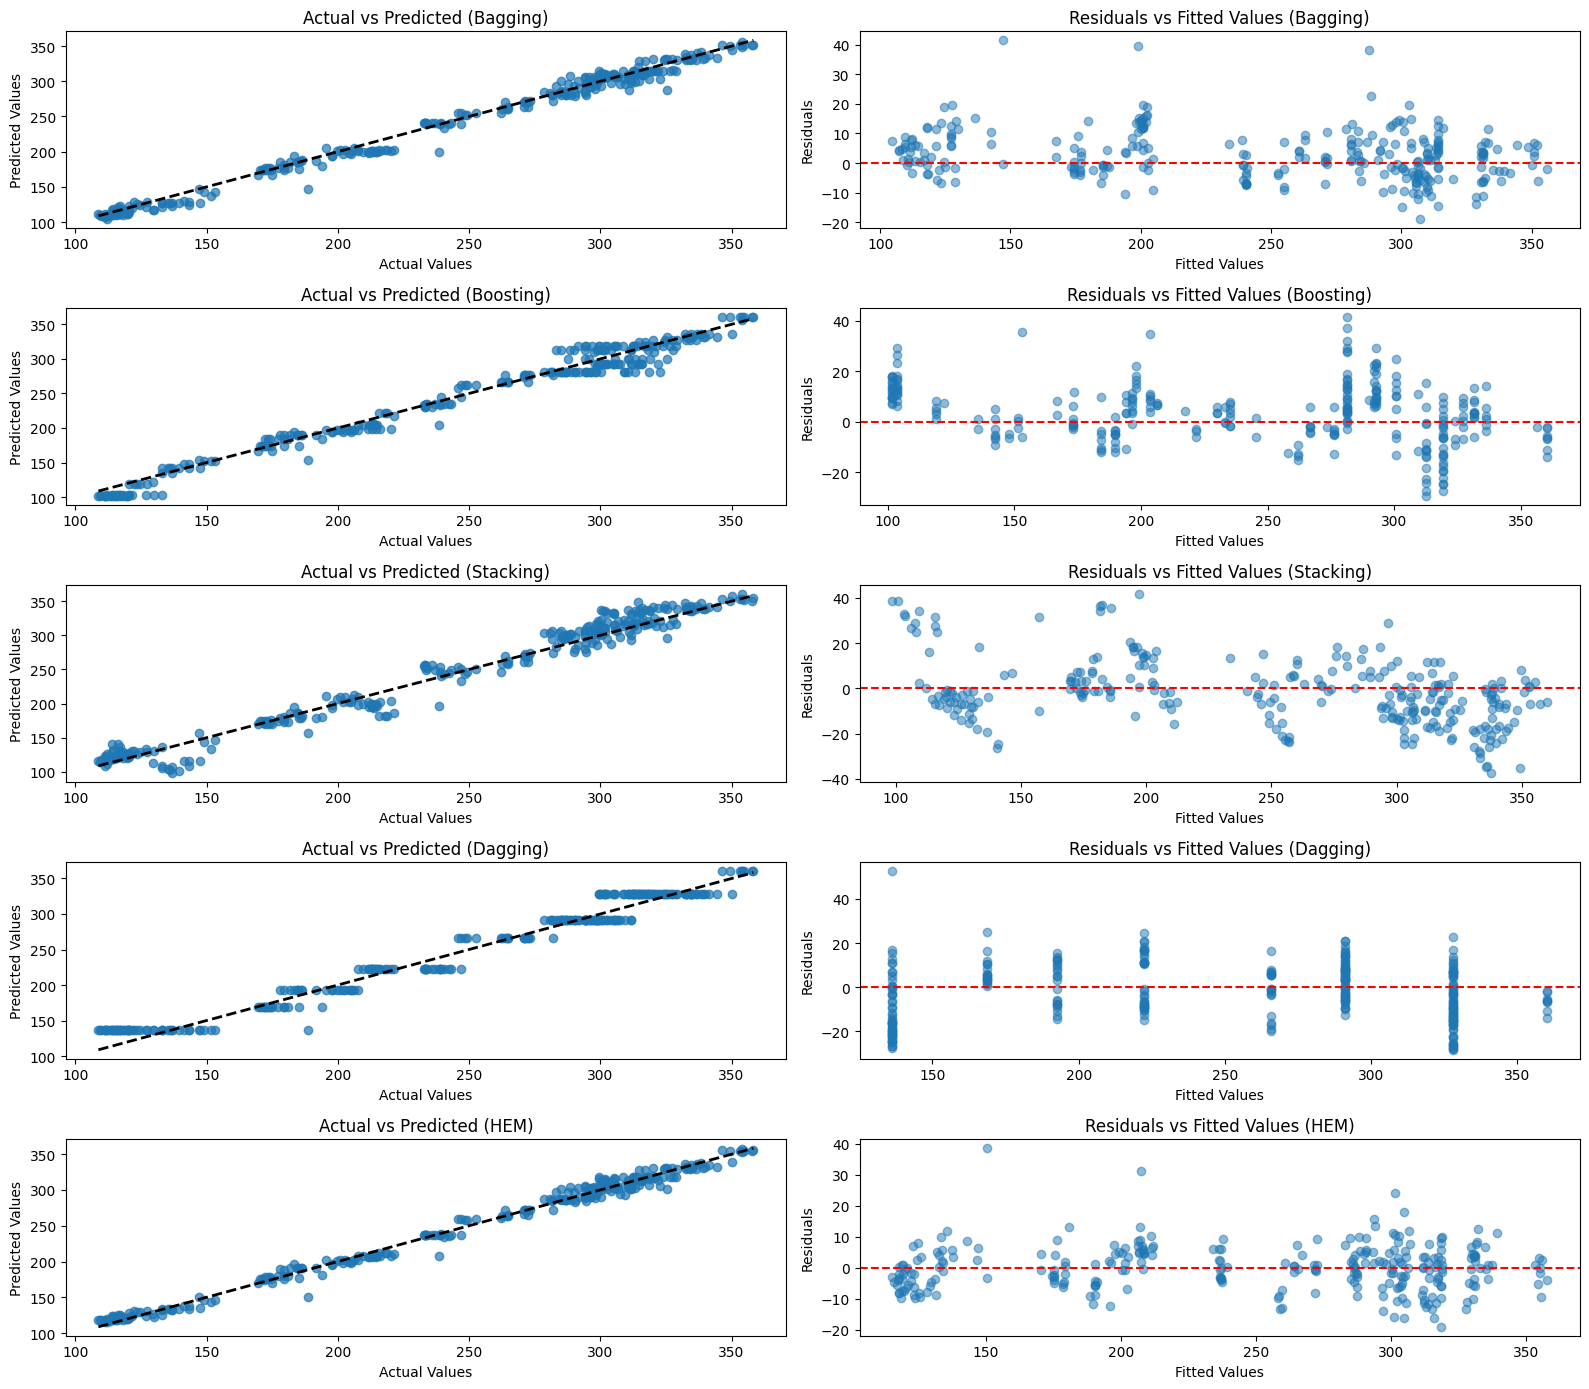

In [ ]:
# Actual vs Predicted and Residuals Plots for Each Model
models = {
    'Bagging': bagging_pred,
    'Boosting': boosting_pred,
    'Stacking': stacking_pred,
    'Dagging': dagging_pred,
    'HEM': final_pred
}

plt.figure(figsize=(16, 14))
for i, (model_name, predictions) in enumerate(models.items(), start=1):
    # Actual vs Predicted
    plt.subplot(5, 2, 2 * i - 1)
    plt.scatter(y_test, predictions, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'Actual vs Predicted ({model_name})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Residuals vs Fitted
    residuals = y_test - predictions
    plt.subplot(5, 2, 2 * i)
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs Fitted Values ({model_name})')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Make Predictions for Each Model
bagging_pred = bagging_model.predict(X_test)
boosting_pred = boosting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)
dagging_pred = dagging_model.predict(X_test)
final_pred = meta_learner.predict(np.column_stack((bagging_pred, boosting_pred, stacking_pred, dagging_pred)))

# Step 2: Create a DataFrame to Compare Predictions with Actual Values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Bagging_Prediction': bagging_pred,
    'Boosting_Prediction': boosting_pred,
    'Stacking_Prediction': stacking_pred,
    'Dagging_Prediction': dagging_pred,
    'Final_Prediction': final_pred
}, index=y_test.index)  # Maintain the same index as y_test

# Display the DataFrame
print(results_df)


                Actual  Bagging_Prediction  Boosting_Prediction  \
Date                                                              
2022-11-16  113.230003          108.467227           101.876113   
2022-11-17  111.449997          110.917307           101.876113   
2022-11-18  112.050003          110.535732           103.665472   
2022-11-21  109.860001          108.651824           103.665472   
2022-11-22  111.440002          107.098244           101.876113   
...                ...                 ...                  ...   
2023-12-26  354.829987          351.034993           360.263377   
2023-12-27  357.829987          351.034993           360.263377   
2023-12-28  358.320007          352.102127           360.263377   
2023-12-29  353.959991          355.942830           360.263377   
2024-01-02  346.290009          352.244120           360.263377   

            Stacking_Prediction  Dagging_Prediction  Final_Prediction  
Date                                                    

In [ ]:
results_df.to_csv('univariatepred.csv')

In [ ]:
from statsmodels.tsa.stattools import acf
from scipy.stats import t

def dm_test(y_true, y_pred1, y_pred2, h=1):
    """
    Diebold-Mariano Test for comparing two forecasting models.

    y_true: Actual values
    y_pred1: Predictions from Model 1
    y_pred2: Predictions from Model 2
    h: Forecast horizon (default = 1 for one-step ahead forecasts)
    """

    e1 = y_true - y_pred1  # Errors of Model 1
    e2 = y_true - y_pred2  # Errors of Model 2
    d = (e1**2 - e2**2)  # Difference in squared errors

    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)

    # Compute autocorrelation adjustment
    gamma = acf(d, nlags=h, fft=False)[1:]
    adj_var_d = var_d + 2 * np.sum(gamma)

    # Compute test statistic
    dm_stat = mean_d / np.sqrt(adj_var_d / len(d))

    # Compute p-value using Student's t-distribution
    df = len(d) - 1
    p_value = 2 * (1 - t.cdf(abs(dm_stat), df))

    return dm_stat, p_value

# Interpretation:
# If p-value < 0.05 → HEM significantly outperforms Bagging


In [ ]:
# Example Usage: Compare HEM vs. Bagging
dm_stat, p_value = dm_test(y_test, final_pred, bagging_pred)
print(f"Diebold-Mariano Test (HEM vs. Bagging): DM-stat = {dm_stat:.4f}, p-value = {p_value:.4f}")

Diebold-Mariano Test (HEM vs. Bagging): DM-stat = -4.0580, p-value = 0.0001


In [ ]:
# Example Usage: Compare HEM vs. Bagging
dm_stat, p_value = dm_test(y_test, final_pred, boosting_pred)
print(f"Diebold-Mariano Test (HEM vs. Bagging): DM-stat = {dm_stat:.4f}, p-value = {p_value:.4f}")

Diebold-Mariano Test (HEM vs. Bagging): DM-stat = -8.0649, p-value = 0.0000


In [ ]:
# Example Usage: Compare HEM vs. Bagging
dm_stat, p_value = dm_test(y_test, final_pred, stacking_pred)
print(f"Diebold-Mariano Test (HEM vs. Bagging): DM-stat = {dm_stat:.4f}, p-value = {p_value:.4f}")

Diebold-Mariano Test (HEM vs. Bagging): DM-stat = -8.6794, p-value = 0.0000


In [ ]:
# Example Usage: Compare HEM vs. Bagging
dm_stat, p_value = dm_test(y_test, final_pred, dagging_pred)
print(f"Diebold-Mariano Test (HEM vs. Bagging): DM-stat = {dm_stat:.4f}, p-value = {p_value:.4f}")

Diebold-Mariano Test (HEM vs. Bagging): DM-stat = -10.0935, p-value = 0.0000


In [ ]:
def mdm_test(y_true, y_pred1, y_pred2, h=1):
    """
    Modified Diebold-Mariano (M-DM) Test for comparing two forecasting models.
    """

    e1 = y_true - y_pred1
    e2 = y_true - y_pred2
    d = (e1**2 - e2**2)

    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    n = len(d)

    # Correction factor for small sample sizes
    correction = (n + 1 - 2 * h + h * (h - 1) / n) / n
    adj_var_d = correction * var_d

    # Compute test statistic
    mdm_stat = mean_d / np.sqrt(adj_var_d / n)

    # Compute p-value using Student's t-distribution
    df = n - 1
    p_value = 2 * (1 - t.cdf(abs(mdm_stat), df))

    return mdm_stat, p_value

# Example Usage: Compare HEM vs. Boosting
mdm_stat, p_value = mdm_test(y_test, final_pred, boosting_pred)
print(f"Modified DM Test (HEM vs. Boosting): M-DM-stat = {mdm_stat:.4f}, p-value = {p_value:.4f}")


Modified DM Test (HEM vs. Boosting): M-DM-stat = -8.0794, p-value = 0.0000


In [ ]:
mdm_stat, p_value = mdm_test(y_test, final_pred, bagging_pred)
print(f"Modified DM Test (HEM vs. Boosting): M-DM-stat = {mdm_stat:.4f}, p-value = {p_value:.4f}")

Modified DM Test (HEM vs. Boosting): M-DM-stat = -4.0654, p-value = 0.0001


In [ ]:
mdm_stat, p_value = mdm_test(y_test, final_pred, stacking_pred)
print(f"Modified DM Test (HEM vs. Boosting): M-DM-stat = {mdm_stat:.4f}, p-value = {p_value:.4f}")

Modified DM Test (HEM vs. Boosting): M-DM-stat = -8.6948, p-value = 0.0000


In [ ]:
mdm_stat, p_value = mdm_test(y_test, final_pred, dagging_pred)
print(f"Modified DM Test (HEM vs. Boosting): M-DM-stat = {mdm_stat:.4f}, p-value = {p_value:.4f}")

Modified DM Test (HEM vs. Boosting): M-DM-stat = -10.1116, p-value = 0.0000


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t
from statsmodels.tsa.stattools import acf

# Function to perform Diebold-Mariano (DM) test
def dm_test(y_true, y_pred1, y_pred2, h=1):
    e1 = y_true - y_pred1  # Errors for Model 1
    e2 = y_true - y_pred2  # Errors for Model 2
    d = (e1**2 - e2**2)  # Difference in squared errors

    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)

    # Compute autocorrelation adjustment
    gamma = acf(d, nlags=h, fft=False)[1:]
    adj_var_d = var_d + 2 * np.sum(gamma)

    # Compute test statistic
    dm_stat = mean_d / np.sqrt(adj_var_d / len(d))

    # Compute p-value using Student's t-distribution
    df = len(d) - 1
    p_value = 2 * (1 - t.cdf(abs(dm_stat), df))

    return dm_stat, p_value

# Define squared errors for each model
losses = {
    "Bagging": (y_test - bagging_pred) ** 2,
    "Boosting": (y_test - boosting_pred) ** 2,
    "Stacking": (y_test - stacking_pred) ** 2,
    "Dagging": (y_test - dagging_pred) ** 2,
    "HEM": (y_test - final_pred) ** 2
}

# Convert losses to DataFrame
loss_df = pd.DataFrame(losses)

# Stepwise elimination procedure
models = list(loss_df.columns)
mcs_set = models.copy()  # Initialize with all models

print("\nPerforming MCS Test...\n")

for model in models:
    if model == "HEM":
        continue  # Skip self-comparison

    dm_stat, p_value = dm_test(y_test, final_pred, loss_df[model])

    if p_value < 0.05:
        print(f"HEM significantly outperforms {model} (p = {p_value:.4f}) - Removing {model} from MCS set.")
        mcs_set.remove(model)

print("\nFinal Model Confidence Set (MCS):", mcs_set)



Performing MCS Test...

HEM significantly outperforms Bagging (p = 0.0000) - Removing Bagging from MCS set.
HEM significantly outperforms Boosting (p = 0.0000) - Removing Boosting from MCS set.
HEM significantly outperforms Stacking (p = 0.0000) - Removing Stacking from MCS set.
HEM significantly outperforms Dagging (p = 0.0012) - Removing Dagging from MCS set.

Final Model Confidence Set (MCS): ['HEM']


In [ ]:
correlation_df = results_df[['Bagging_Prediction', 'Boosting_Prediction', 'Stacking_Prediction', 'Dagging_Prediction','Final_Prediction']].corr()
print(correlation_df)


                     Bagging_Prediction  Boosting_Prediction  \
Bagging_Prediction             1.000000             0.991826   
Boosting_Prediction            0.991826             1.000000   
Stacking_Prediction            0.991360             0.969003   
Dagging_Prediction             0.983944             0.973865   
Final_Prediction               0.998971             0.993261   

                     Stacking_Prediction  Dagging_Prediction  Final_Prediction  
Bagging_Prediction              0.991360            0.983944          0.998971  
Boosting_Prediction             0.969003            0.973865          0.993261  
Stacking_Prediction             1.000000            0.979437          0.989187  
Dagging_Prediction              0.979437            1.000000          0.989809  
Final_Prediction                0.989187            0.989809          1.000000  


In [ ]:
from sklearn.model_selection import cross_val_score

bagging_scores = cross_val_score(bagging_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
boosting_scores = cross_val_score(boosting_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
stacking_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dagging_scores = cross_val_score(dagging_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
melding_scores = cross_val_score(meta_learner, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Bagging MSE:", -np.mean(bagging_scores))
print("Boosting MSE:", -np.mean(boosting_scores))
print("Stacking MSE:", -np.mean(stacking_scores))
print("Dagging MSE:", -np.mean(dagging_scores))
print("Melding (Meta) MSE:", -np.mean(melding_scores))



Bagging MSE: 413.25535872960455
Boosting MSE: 829.1558279968871
Stacking MSE: 314.4392872409633
Dagging MSE: 894.2718996359257
Melding (Meta) MSE: 41.92135684074814


Text(0.5, 0, 'Residuals')

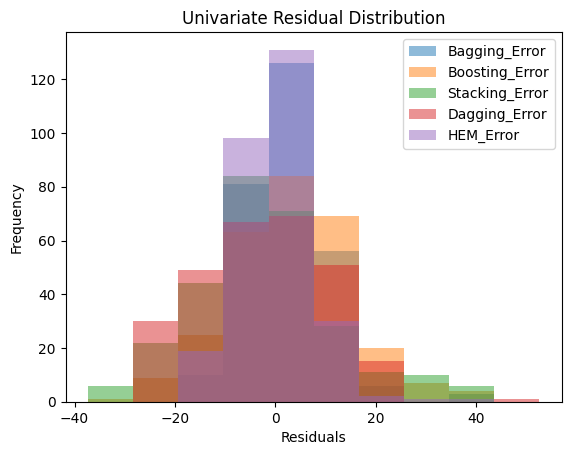

In [ ]:
results_df['HEM_Error'] = y_test - final_pred
results_df[['Bagging_Error', 'Boosting_Error', 'Stacking_Error', 'Dagging_Error']] = results_df[['Actual']].values - results_df[['Bagging_Prediction', 'Boosting_Prediction', 'Stacking_Prediction', 'Dagging_Prediction']]

# Plot residuals over time or using histograms for distribution
results_df[['Bagging_Error', 'Boosting_Error', 'Stacking_Error', 'Dagging_Error', 'HEM_Error']].plot(kind='hist', alpha=0.5)
plt.title('Univariate Residual Distribution')
plt.xlabel('Residuals')


In [ ]:
rolling_window = 30  # Example window size
results_df['HEM_RMSE'] = (results_df['HEM_Error'] ** 2).rolling(window=rolling_window).mean().apply(np.sqrt)
results_df[['Bagging_Error', 'Boosting_Error', 'Stacking_Error', 'Dagging_Error']].apply(lambda col: (col ** 2).rolling(window=rolling_window).mean().apply(np.sqrt))


Bagging_Error  Boosting_Error  Stacking_Error  Dagging_Error
Date                                                                    
2022-11-16            NaN             NaN             NaN            NaN
2022-11-17            NaN             NaN             NaN            NaN
2022-11-18            NaN             NaN             NaN            NaN
2022-11-21            NaN             NaN             NaN            NaN
2022-11-22            NaN             NaN             NaN            NaN
...                   ...             ...             ...            ...
2023-12-26       5.529575        6.212151        8.657974       8.937260
2023-12-27       5.661587        6.213504        8.627307       8.944078
2023-12-28       5.677723        5.979828        8.637124       8.815511
2023-12-29       5.673144        6.083826        8.578795       8.843499
2024-01-02       5.754011        6.575392        8.667819       9.126194

[282 rows x 4 columns]

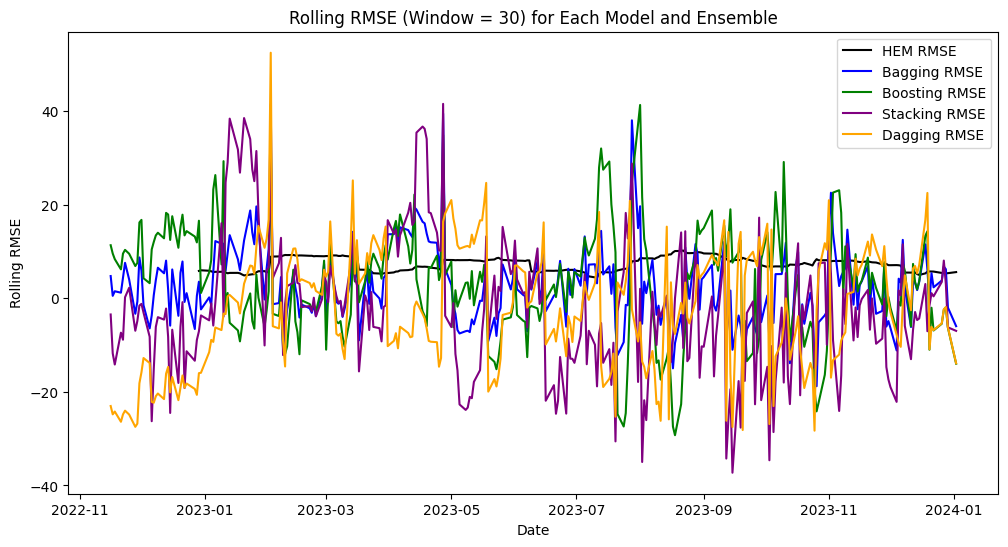

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['HEM_RMSE'], label='HEM RMSE', color='black')
plt.plot(results_df.index, results_df['Bagging_Error'], label='Bagging RMSE', color='blue')
plt.plot(results_df.index, results_df['Boosting_Error'], label='Boosting RMSE', color='green')
plt.plot(results_df.index, results_df['Stacking_Error'], label='Stacking RMSE', color='purple')
plt.plot(results_df.index, results_df['Dagging_Error'], label='Dagging RMSE', color='orange')
plt.xlabel('Date')
plt.ylabel('Rolling RMSE')
plt.legend()
plt.title(f'Rolling RMSE (Window = {rolling_window}) for Each Model and Ensemble')
plt.show()


In [ ]:
results_df['Ensemble_vs_Bagging'] = results_df['Ensemble_RMSE'] / results_df['Bagging_Error']
results_df['Ensemble_vs_Boosting'] = results_df['Ensemble_RMSE'] / results_df['Boosting_Error']
results_df['Ensemble_vs_Stacking'] = results_df['Ensemble_RMSE'] / results_df['Stacking_Error']
results_df['Ensemble_vs_Dagging'] = results_df['Ensemble_RMSE'] / results_df['Dagging_Error']

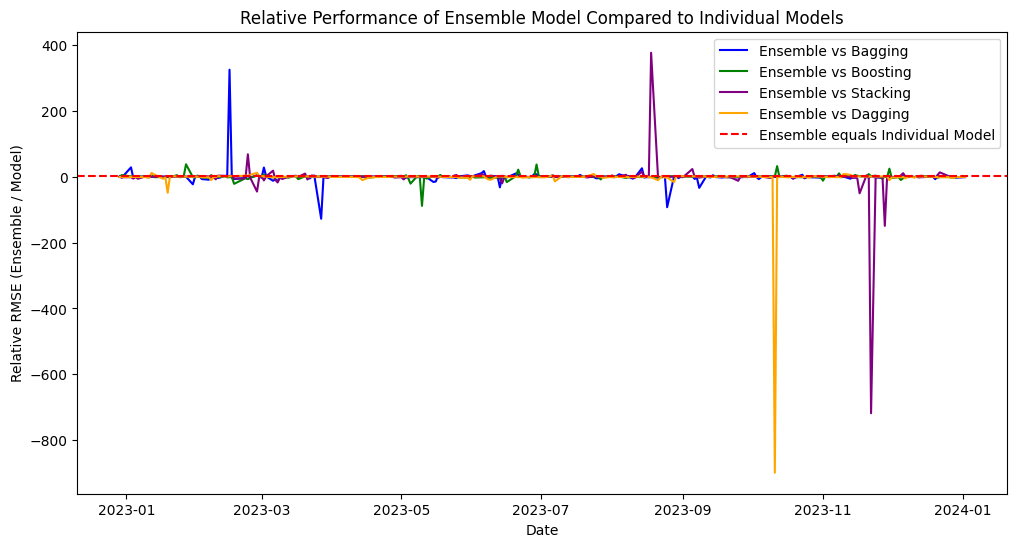

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot relative performance of ensemble vs each individual model
plt.plot(results_df.index, results_df['Ensemble_vs_Bagging'], label='Ensemble vs Bagging', color='blue')
plt.plot(results_df.index, results_df['Ensemble_vs_Boosting'], label='Ensemble vs Boosting', color='green')
plt.plot(results_df.index, results_df['Ensemble_vs_Stacking'], label='Ensemble vs Stacking', color='purple')
plt.plot(results_df.index, results_df['Ensemble_vs_Dagging'], label='Ensemble vs Dagging', color='orange')

# Add a horizontal line at y=1 to mark the threshold
plt.axhline(1, color='red', linestyle='--', label='Ensemble equals Individual Model')

# Labeling the plot
plt.xlabel('Date')
plt.ylabel('Relative RMSE (Ensemble / Model)')
plt.title('Relative Performance of Ensemble Model Compared to Individual Models')
plt.legend()
plt.show()


In [ ]:
mean_rolling_rmse = results_df[['Ensemble_RMSE', 'Bagging_Error', 'Boosting_Error', 'Stacking_Error', 'Dagging_Error']].mean()
print("Mean Rolling RMSE across the test period:")
print(mean_rolling_rmse)


Mean Rolling RMSE across the test period:
Ensemble_RMSE     7.302199
Bagging_Error     2.717050
Boosting_Error    3.346762
Stacking_Error   -2.125501
Dagging_Error    -2.325282
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, StackingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset (limit to 400 rows for simplicity)
data = pd.read_csv('/content/META.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Step 1: Input Data Transformation
X = data.drop(['Close'], axis=1)  # Use all features except 'Close' as predictors
y = data['Close']  # Target variable

# Split the dataset into train and test (no shuffle to preserve time series order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Custom base estimator for Dagging
class DaggingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        # Split the data using KFold for Dagging
        kf = KFold(n_splits=self.n_estimators, shuffle=True, random_state=42)
        for train_index, _ in kf.split(X):
            model = self.base_estimator.fit(X.iloc[train_index], y.iloc[train_index])
            self.models.append(model)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict(X)
        return np.mean(predictions, axis=1)

# Step 2: Implement Different Ensemble Models with Data Diversity

# 1. Bagging using Decision Tree (Bootstrap random sampling of data)
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=10,
    random_state=42,
    bootstrap=True,  # Random sampling with replacement
    max_samples=0.8  # Each model gets 80% of the data with replacement
)

# 2. Boosting using AdaBoost with Decision Tree as base estimator
# Boosting sequentially adapts to errors made by prior models
boosting_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=10,
    random_state=42
)

# 3. Stacking: Meta-learner using Linear Regression, base models add diversity
stacking_model = StackingRegressor(
    estimators=[
        ('bagging', bagging_model),
        ('boosting', boosting_model),
        ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
    ],
    final_estimator=LinearRegression(),
    passthrough=False  # Only pass the predictions of the base models to the meta-learner
)

# 4. Dagging using a custom implementation
# Split the data into K folds, each model trains on a fold
dagging_model = DaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=5
)


# Step 3: Train Each Ensemble Model (introducing diverse data for each)
print("Training Bagging model (with bootstrap sampling)...")
bagging_model.fit(X_train, y_train)

print("Training Boosting model (sequential learning)...")
boosting_model.fit(X_train, y_train)

print("Training Stacking model (using base learner predictions)...")
stacking_model.fit(X_train, y_train)

print("Training Dagging model (with k-fold splits)...")
dagging_model.fit(X_train, y_train)

# Step 4: Make Predictions from Each Model
print("Making predictions...")
bagging_pred = bagging_model.predict(X_test)
boosting_pred = boosting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)
dagging_pred = dagging_model.predict(X_test)

# Step 5: Combine Predictions for Meta-Learner Aggregation
combined_predictions = np.column_stack((bagging_pred, boosting_pred, stacking_pred, dagging_pred))

# Final Meta-Learner: Linear Regression to aggregate predictions
meta_learner = LinearRegression().fit(combined_predictions, y_test)

# Final prediction
final_pred = meta_learner.predict(combined_predictions)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, final_pred)
print(f"Mean Squared Error: {mse}")


Training Bagging model (with bootstrap sampling)...
Training Boosting model (sequential learning)...
Training Stacking model (using base learner predictions)...
Training Dagging model (with k-fold splits)...
Making predictions...
Mean Squared Error: 20.03013381680273


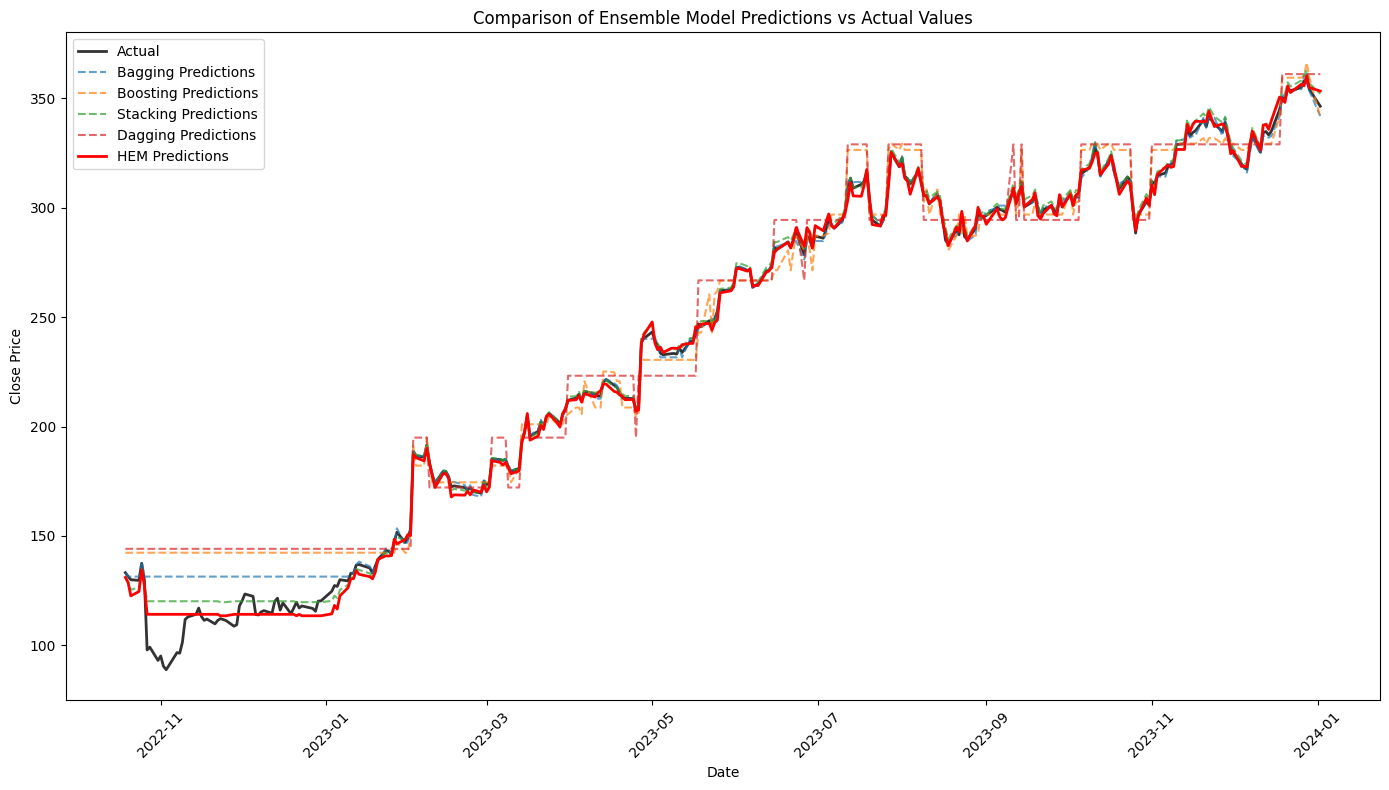

In [ ]:
import matplotlib.pyplot as plt

# Step 7: Plot the Results

# Create a figure to compare predictions of all models
plt.figure(figsize=(14, 8))

# Plot actual values
plt.plot(y_test.index, y_test, label="Actual", color='black', linewidth=2, alpha=0.8)

# Plot predictions from individual models
plt.plot(y_test.index, bagging_pred, label="Bagging Predictions", linestyle='--', alpha=0.7)
plt.plot(y_test.index, boosting_pred, label="Boosting Predictions", linestyle='--', alpha=0.7)
plt.plot(y_test.index, stacking_pred, label="Stacking Predictions", linestyle='--', alpha=0.7)
plt.plot(y_test.index, dagging_pred, label="Dagging Predictions", linestyle='--', alpha=0.7)

# Plot final meta-learner's predictions (combined predictions)
plt.plot(y_test.index, final_pred, label="HEM Predictions", color='red', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('Comparison of Ensemble Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Training Metrics for Bagging Model:
  Mean Squared Error (MSE): 1.2940
  Mean Absolute Error (MAE): 0.8245
  R-Squared (R²): 0.9997
  Symmetric Mean Absolute Percentage Error (sMAPE): 0.38%
  Directional Accuracy (DA): 90.63%

Training Metrics for Boosting Model:
  Mean Squared Error (MSE): 27.5174
  Mean Absolute Error (MAE): 4.3104
  R-Squared (R²): 0.9934
  Symmetric Mean Absolute Percentage Error (sMAPE): 2.02%
  Directional Accuracy (DA): 67.25%

Training Metrics for Stacking Model:
  Mean Squared Error (MSE): 3.2200
  Mean Absolute Error (MAE): 1.2874
  R-Squared (R²): 0.9992
  Symmetric Mean Absolute Percentage Error (sMAPE): 0.54%
  Directional Accuracy (DA): 89.05%

Training Metrics for Dagging Model:
  Mean Squared Error (MSE): 72.4707
  Mean Absolute Error (MAE): 7.2128
  R-Squared (R²): 0.9827
  Symmetric Mean Absolute Percentage Error (sMAPE): 3.44%
  Directional Accuracy (DA): 62.19%

Training Metrics for Melding Model (HEM):
  Mean Squared Error (MSE): 4.4471
  Mean Abso

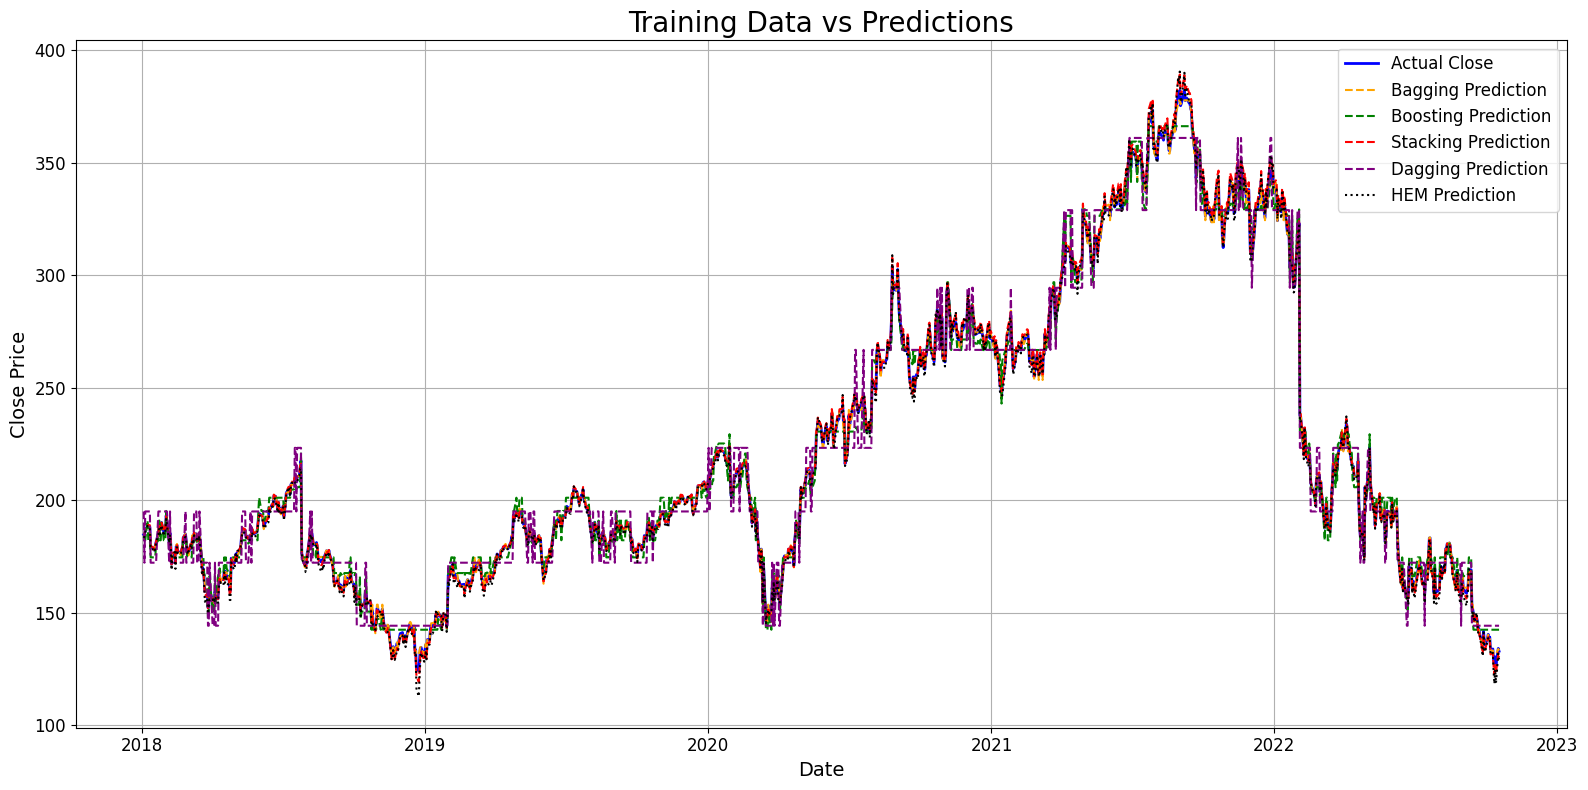

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Directional Accuracy (DA)
def directional_accuracy(y_true, y_pred):
    actual_direction = np.sign(y_true[1:] - y_true[:-1])  # Sign of actual change
    predicted_direction = np.sign(y_pred[1:] - y_true[:-1])  # Sign of predicted change
    return np.mean(actual_direction == predicted_direction) * 100  # Percentage

# Function to calculate Symmetric MAPE (sMAPE)
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Function to evaluate model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    smape_value = smape(y_true, y_pred)
    da = directional_accuracy(y_true.values, y_pred)

    print(f"Training Metrics for {model_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-Squared (R²): {r2:.4f}")
    print(f"  Symmetric Mean Absolute Percentage Error (sMAPE): {smape_value:.2f}%")
    print(f"  Directional Accuracy (DA): {da:.2f}%\n")

    return mse, mae, r2, smape_value, da

# Make predictions on the training set for evaluation
train_bagging_pred = bagging_model.predict(X_train)
train_boosting_pred = boosting_model.predict(X_train)
train_stacking_pred = stacking_model.predict(X_train)
train_dagging_pred = dagging_model.predict(X_train)
train_meta_pred = meta_learner.predict(np.column_stack((train_bagging_pred, train_boosting_pred, train_stacking_pred, train_dagging_pred)))

# Create a DataFrame to hold training predictions
train_forecast_df = pd.DataFrame({
    'Actual': y_train,
    'Bagging': train_bagging_pred,
    'Boosting': train_boosting_pred,
    'Stacking': train_stacking_pred,
    'Dagging': train_dagging_pred,
    'Melding': train_meta_pred  # Meta predictions
}, index=X_train.index)

# Evaluate each model
mse_bagging, mae_bagging, r2_bagging, smape_bagging, da_bagging = evaluate_model(y_train, train_bagging_pred, "Bagging Model")
mse_boosting, mae_boosting, r2_boosting, smape_boosting, da_boosting = evaluate_model(y_train, train_boosting_pred, "Boosting Model")
mse_stacking, mae_stacking, r2_stacking, smape_stacking, da_stacking = evaluate_model(y_train, train_stacking_pred, "Stacking Model")
mse_dagging, mae_dagging, r2_dagging, smape_dagging, da_dagging = evaluate_model(y_train, train_dagging_pred, "Dagging Model")
mse_meta, mae_meta, r2_meta, smape_meta, da_meta = evaluate_model(y_train, train_meta_pred, "Melding Model (HEM)")

# Store metrics in DataFrame
metrics = {
    'Model': ['Bagging', 'Boosting', 'Stacking', 'Dagging', 'HEM'],
    'MSE': [mse_bagging, mse_boosting, mse_stacking, mse_dagging, mse_meta],
    'MAE': [mae_bagging, mae_boosting, mae_stacking, mae_dagging, mae_meta],
    'R-Squared': [r2_bagging, r2_boosting, r2_stacking, r2_dagging, r2_meta],
    'sMAPE (%)': [smape_bagging, smape_boosting, smape_stacking, smape_dagging, smape_meta],
    'DA (%)': [da_bagging, da_boosting, da_stacking, da_dagging, da_meta]
}

metrics_df = pd.DataFrame(metrics)

# Print the evaluation metrics
print("\nTraining Evaluation Metrics:")
print(metrics_df)

# Plot the training data and predictions
plt.figure(figsize=(16, 8))

# Plot actual training values
plt.plot(train_forecast_df.index, train_forecast_df['Actual'], label='Actual Close', color='blue', linewidth=2)

# Plot predictions from each model
plt.plot(train_forecast_df.index, train_forecast_df['Bagging'], label='Bagging Prediction', color='orange', linestyle='--')
plt.plot(train_forecast_df.index, train_forecast_df['Boosting'], label='Boosting Prediction', color='green', linestyle='--')
plt.plot(train_forecast_df.index, train_forecast_df['Stacking'], label='Stacking Prediction', color='red', linestyle='--')
plt.plot(train_forecast_df.index, train_forecast_df['Dagging'], label='Dagging Prediction', color='purple', linestyle='--')
plt.plot(train_forecast_df.index, train_forecast_df['Melding'], label='HEM Prediction', color='black', linestyle=':')

# Title and labels
plt.title('Training Data vs Predictions', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Directional Accuracy (DA)
def directional_accuracy(y_true, y_pred):
    actual_direction = np.sign(y_true[1:] - y_true[:-1])  # Sign of actual change
    predicted_direction = np.sign(y_pred[1:] - y_true[:-1])  # Sign of predicted change
    return np.mean(actual_direction == predicted_direction) * 100  # Percentage

# Function to calculate Symmetric MAPE (sMAPE)
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Modified evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    smape_value = smape(y_true, y_pred)
    da = directional_accuracy(y_true.values, y_pred)

    print(f"Evaluation metrics for {model_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-Squared (R²): {r2:.4f}")
    print(f"  Symmetric Mean Absolute Percentage Error (sMAPE): {smape_value:.2f}%")
    print(f"  Directional Accuracy (DA): {da:.2f}%\n")

    return mse, mae, r2, smape_value, da

# Evaluate each individual model
metrics_bagging = evaluate_model(y_test, bagging_pred, "Bagging Model")
metrics_boosting = evaluate_model(y_test, boosting_pred, "Boosting Model")
metrics_stacking = evaluate_model(y_test, stacking_pred, "Stacking Model")
metrics_dagging = evaluate_model(y_test, dagging_pred, "Dagging Model")

# Evaluate the final prediction from the meta-learner
metrics_meta = evaluate_model(y_test, final_pred, "Meta-Learner (HEM)")


Evaluation metrics for Bagging Model:
  Mean Squared Error (MSE): 76.5071
  Mean Absolute Error (MAE): 3.9675
  R-Squared (R²): 0.9881
  Symmetric Mean Absolute Percentage Error (sMAPE): 2.93%
  Directional Accuracy (DA): 84.72%

Evaluation metrics for Boosting Model:
  Mean Squared Error (MSE): 198.8437
  Mean Absolute Error (MAE): 9.4317
  R-Squared (R²): 0.9690
  Symmetric Mean Absolute Percentage Error (sMAPE): 5.71%
  Directional Accuracy (DA): 68.11%

Evaluation metrics for Stacking Model:
  Mean Squared Error (MSE): 29.6872
  Mean Absolute Error (MAE): 2.9806
  R-Squared (R²): 0.9954
  Symmetric Mean Absolute Percentage Error (sMAPE): 1.89%
  Directional Accuracy (DA): 81.73%

Evaluation metrics for Dagging Model:
  Mean Squared Error (MSE): 258.5314
  Mean Absolute Error (MAE): 12.0892
  R-Squared (R²): 0.9597
  Symmetric Mean Absolute Percentage Error (sMAPE): 6.88%
  Directional Accuracy (DA): 56.81%

Evaluation metrics for Meta-Learner (HEM):
  Mean Squared Error (MSE): 20.0

In [ ]:
# Step 1: Make Predictions for Each Model
bagging_pred = bagging_model.predict(X_test)
boosting_pred = boosting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)
dagging_pred = dagging_model.predict(X_test)
final_pred = meta_learner.predict(np.column_stack((bagging_pred, boosting_pred, stacking_pred, dagging_pred)))

# Step 2: Create a DataFrame to Compare Predictions with Actual Values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Bagging_Prediction': bagging_pred,
    'Boosting_Prediction': boosting_pred,
    'Stacking_Prediction': stacking_pred,
    'Dagging_Prediction': dagging_pred,
    'Final_Prediction': final_pred
}, index=y_test.index)  # Maintain the same index as y_test

# Display the DataFrame
print(results_df)


                Actual  Bagging_Prediction  Boosting_Prediction  \
Date                                                              
2022-10-19  133.229996          133.103900           142.351776   
2022-10-20  131.529999          131.444661           142.351776   
2022-10-21  130.009995          131.444661           142.351776   
2022-10-24  129.720001          131.444661           142.351776   
2022-10-25  137.509995          138.274894           142.351776   
...                ...                 ...                  ...   
2023-12-26  354.829987          354.030209           359.325152   
2023-12-27  357.829987          360.076837           360.103439   
2023-12-28  358.320007          360.883777           366.181530   
2023-12-29  353.959991          353.244872           359.325152   
2024-01-02  346.290009          341.842378           341.388587   

            Stacking_Prediction  Dagging_Prediction  Final_Prediction  
Date                                                    

In [ ]:
results_df.to_csv('multivariatepred.csv')

In [ ]:
from statsmodels.tsa.stattools import acf
from scipy.stats import t

def dm_test(y_true, y_pred1, y_pred2, h=1):
    """
    Diebold-Mariano Test for comparing two forecasting models.

    y_true: Actual values
    y_pred1: Predictions from Model 1
    y_pred2: Predictions from Model 2
    h: Forecast horizon (default = 1 for one-step ahead forecasts)
    """

    e1 = y_true - y_pred1  # Errors of Model 1
    e2 = y_true - y_pred2  # Errors of Model 2
    d = (e1**2 - e2**2)  # Difference in squared errors

    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)

    # Compute autocorrelation adjustment
    gamma = acf(d, nlags=h, fft=False)[1:]
    adj_var_d = var_d + 2 * np.sum(gamma)

    # Compute test statistic
    dm_stat = mean_d / np.sqrt(adj_var_d / len(d))

    # Compute p-value using Student's t-distribution
    df = len(d) - 1
    p_value = 2 * (1 - t.cdf(abs(dm_stat), df))

    return dm_stat, p_value

# Interpretation:
# If p-value < 0.05 → HEM significantly outperforms Bagging


In [ ]:
# Example Usage: Compare HEM vs. Bagging
dm_stat, p_value = dm_test(y_test, final_pred, bagging_pred)
print(f"Diebold-Mariano Test (HEM vs. Bagging): DM-stat = {dm_stat:.4f}, p-value = {p_value:.4f}")

Diebold-Mariano Test (HEM vs. Bagging): DM-stat = -5.1100, p-value = 0.0000


In [ ]:
boost = dm_stat, p_value = dm_test(y_test, final_pred, boosting_pred)
stack = dm_stat, p_value = dm_test(y_test, final_pred, stacking_pred)
dagg = dm_stat, p_value = dm_test(y_test, final_pred, dagging_pred)

In [ ]:
boost

(np.float64(-7.934882907305926), np.float64(4.1744385725905886e-14))

In [ ]:
stack

(np.float64(-3.2298722764383574), np.float64(0.0013754717729210775))

In [ ]:
dagg

(np.float64(-9.776317188748525), np.float64(0.0))

In [ ]:
def mdm_test(y_true, y_pred1, y_pred2, h=1):
    """
    Modified Diebold-Mariano (M-DM) Test for comparing two forecasting models.
    """

    e1 = y_true - y_pred1
    e2 = y_true - y_pred2
    d = (e1**2 - e2**2)

    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    n = len(d)

    # Correction factor for small sample sizes
    correction = (n + 1 - 2 * h + h * (h - 1) / n) / n
    adj_var_d = correction * var_d

    # Compute test statistic
    mdm_stat = mean_d / np.sqrt(adj_var_d / n)

    # Compute p-value using Student's t-distribution
    df = n - 1
    p_value = 2 * (1 - t.cdf(abs(mdm_stat), df))

    return mdm_stat, p_value

# Example Usage: Compare HEM vs. Boosting
mdm_stat, p_value = mdm_test(y_test, final_pred, boosting_pred)
print(f"Modified DM Test (HEM vs. Boosting): M-DM-stat = {mdm_stat:.4f}, p-value = {p_value:.4f}")


Modified DM Test (HEM vs. Boosting): M-DM-stat = -7.9481, p-value = 0.0000


In [ ]:
mdm_stat, p_value = mdm_test(y_test, final_pred, bagging_pred)
print(f"Modified DM Test (HEM vs. Boosting): M-DM-stat = {mdm_stat:.4f}, p-value = {p_value:.4f}")

Modified DM Test (HEM vs. Boosting): M-DM-stat = -5.1186, p-value = 0.0000


In [ ]:
mdm_stat, p_value = mdm_test(y_test, final_pred, stacking_pred)
print(f"Modified DM Test (HEM vs. Boosting): M-DM-stat = {mdm_stat:.4f}, p-value = {p_value:.4f}")

Modified DM Test (HEM vs. Boosting): M-DM-stat = -3.2363, p-value = 0.0013


In [ ]:
mdm_stat, p_value = mdm_test(y_test, final_pred, dagging_pred)
print(f"Modified DM Test (HEM vs. Boosting): M-DM-stat = {mdm_stat:.4f}, p-value = {p_value:.4f}")

Modified DM Test (HEM vs. Boosting): M-DM-stat = -9.7926, p-value = 0.0000


In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t
from statsmodels.tsa.stattools import acf

# Function to perform Diebold-Mariano (DM) test
def dm_test(y_true, y_pred1, y_pred2, h=1):
    e1 = y_true - y_pred1  # Errors for Model 1
    e2 = y_true - y_pred2  # Errors for Model 2
    d = (e1**2 - e2**2)  # Difference in squared errors

    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)

    # Compute autocorrelation adjustment
    gamma = acf(d, nlags=h, fft=False)[1:]
    adj_var_d = var_d + 2 * np.sum(gamma)

    # Compute test statistic
    dm_stat = mean_d / np.sqrt(adj_var_d / len(d))

    # Compute p-value using Student's t-distribution
    df = len(d) - 1
    p_value = 2 * (1 - t.cdf(abs(dm_stat), df))

    return dm_stat, p_value

# Define squared errors for each model
losses = {
    "Bagging": (y_test - bagging_pred) ** 2,
    "Boosting": (y_test - boosting_pred) ** 2,
    "Stacking": (y_test - stacking_pred) ** 2,
    "Dagging": (y_test - dagging_pred) ** 2,
    "HEM": (y_test - final_pred) ** 2
}

# Convert losses to DataFrame
loss_df = pd.DataFrame(losses)

# Stepwise elimination procedure
models = list(loss_df.columns)
mcs_set = models.copy()  # Initialize with all models

print("\nPerforming MCS Test...\n")

for model in models:
    if model == "HEM":
        continue  # Skip self-comparison

    dm_stat, p_value = dm_test(y_test, final_pred, loss_df[model])

    if p_value < 0.05:
        print(f"HEM significantly outperforms {model} (p = {p_value:.4f}) - Removing {model} from MCS set.")
        mcs_set.remove(model)

print("\nFinal Model Confidence Set (MCS):", mcs_set)



Performing MCS Test...

HEM significantly outperforms Bagging (p = 0.0000) - Removing Bagging from MCS set.
HEM significantly outperforms Boosting (p = 0.0000) - Removing Boosting from MCS set.
HEM significantly outperforms Stacking (p = 0.0000) - Removing Stacking from MCS set.
HEM significantly outperforms Dagging (p = 0.0000) - Removing Dagging from MCS set.

Final Model Confidence Set (MCS): ['HEM']


In [ ]:
correlation_df = results_df[['Bagging_Prediction', 'Boosting_Prediction', 'Stacking_Prediction', 'Dagging_Prediction','Final_Prediction']].corr()
print(correlation_df)


                     Bagging_Prediction  Boosting_Prediction  \
Bagging_Prediction             1.000000             0.995823   
Boosting_Prediction            0.995823             1.000000   
Stacking_Prediction            0.999089             0.992751   
Dagging_Prediction             0.991896             0.995969   
Final_Prediction               0.997898             0.990913   

                     Stacking_Prediction  Dagging_Prediction  Final_Prediction  
Bagging_Prediction              0.999089            0.991896          0.997898  
Boosting_Prediction             0.992751            0.995969          0.990913  
Stacking_Prediction             1.000000            0.988972          0.999740  
Dagging_Prediction              0.988972            1.000000          0.986964  
Final_Prediction                0.999740            0.986964          1.000000  


In [ ]:
from sklearn.model_selection import cross_val_score

bagging_scores = cross_val_score(bagging_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
boosting_scores = cross_val_score(boosting_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
stacking_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dagging_scores = cross_val_score(dagging_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
melding_scores = cross_val_score(meta_learner, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Bagging MSE:", -np.mean(bagging_scores))
print("Boosting MSE:", -np.mean(boosting_scores))
print("Stacking MSE:", -np.mean(stacking_scores))
print("Dagging MSE:", -np.mean(dagging_scores))
print("Melding (Meta) MSE:", -np.mean(melding_scores))

Bagging MSE: 24.561478322855066
Boosting MSE: 80.60684708086355
Stacking MSE: 60.87103984045505
Dagging MSE: 140.34277209654505
Melding (Meta) MSE: 1.3807265807027292e-15


Text(0.5, 0, 'Residuals')

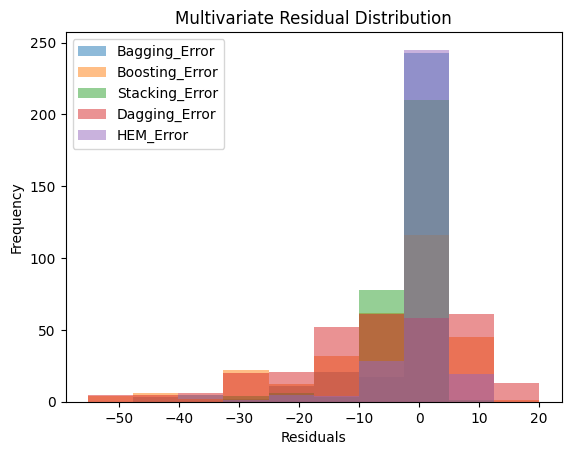

In [ ]:
results_df['HEM_Error'] = y_test - final_pred
results_df[['Bagging_Error', 'Boosting_Error', 'Stacking_Error', 'Dagging_Error']] = results_df[['Actual']].values - results_df[['Bagging_Prediction', 'Boosting_Prediction', 'Stacking_Prediction', 'Dagging_Prediction']]

# Plot residuals over time or using histograms for distribution
results_df[['Bagging_Error', 'Boosting_Error', 'Stacking_Error', 'Dagging_Error', 'HEM_Error']].plot(kind='hist', alpha=0.5)
plt.title('Multivariate Residual Distribution')
plt.xlabel('Residuals')


In [ ]:
rolling_window = 30  # Example window size
results_df['HEM_RMSE'] = (results_df['HEM_Error'] ** 2).rolling(window=rolling_window).mean().apply(np.sqrt)
results_df[['Bagging_Error', 'Boosting_Error', 'Stacking_Error', 'Dagging_Error']].apply(lambda col: (col ** 2).rolling(window=rolling_window).mean().apply(np.sqrt))


Bagging_Error  Boosting_Error  Stacking_Error  Dagging_Error
Date                                                                    
2022-10-19            NaN             NaN             NaN            NaN
2022-10-20            NaN             NaN             NaN            NaN
2022-10-21            NaN             NaN             NaN            NaN
2022-10-24            NaN             NaN             NaN            NaN
2022-10-25            NaN             NaN             NaN            NaN
...                   ...             ...             ...            ...
2023-12-26       1.628286        6.062562        3.354724       7.850791
2023-12-27       1.636371        6.076754        3.367263       7.871372
2023-12-28       1.701884        6.107276        3.390869       7.768509
2023-12-29       1.700563        6.151917        3.365326       7.841818
2024-01-02       1.865397        6.149362        3.430764       8.229720

[302 rows x 4 columns]

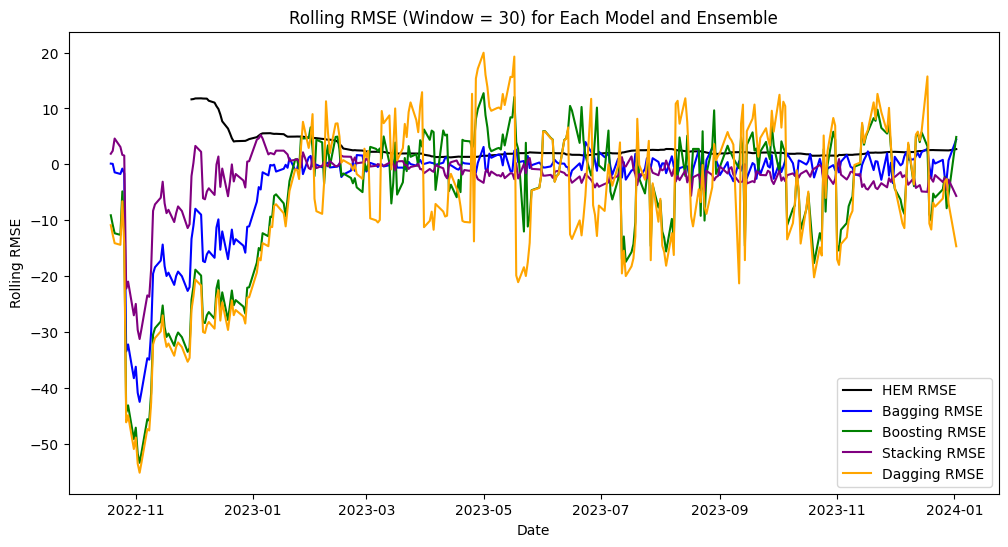

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['HEM_RMSE'], label='HEM RMSE', color='black')
plt.plot(results_df.index, results_df['Bagging_Error'], label='Bagging RMSE', color='blue')
plt.plot(results_df.index, results_df['Boosting_Error'], label='Boosting RMSE', color='green')
plt.plot(results_df.index, results_df['Stacking_Error'], label='Stacking RMSE', color='purple')
plt.plot(results_df.index, results_df['Dagging_Error'], label='Dagging RMSE', color='orange')
plt.xlabel('Date')
plt.ylabel('Rolling RMSE')
plt.legend()
plt.title(f'Rolling RMSE (Window = {rolling_window}) for Each Model and Ensemble')
plt.show()


In [ ]:
results_df['Ensemble_vs_Bagging'] = results_df['Ensemble_RMSE'] / results_df['Bagging_Error']
results_df['Ensemble_vs_Boosting'] = results_df['Ensemble_RMSE'] / results_df['Boosting_Error']
results_df['Ensemble_vs_Stacking'] = results_df['Ensemble_RMSE'] / results_df['Stacking_Error']
results_df['Ensemble_vs_Dagging'] = results_df['Ensemble_RMSE'] / results_df['Dagging_Error']

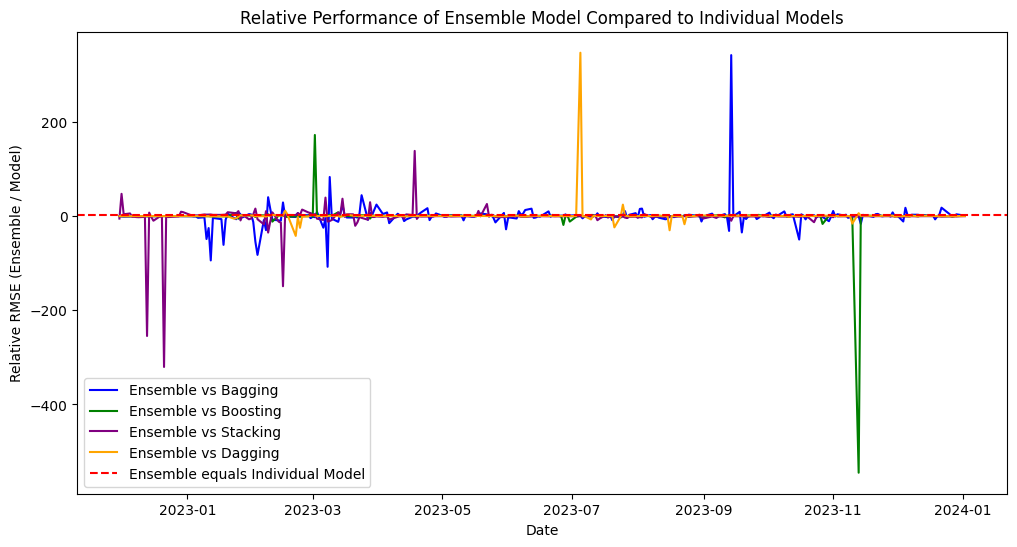

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot relative performance of ensemble vs each individual model
plt.plot(results_df.index, results_df['Ensemble_vs_Bagging'], label='Ensemble vs Bagging', color='blue')
plt.plot(results_df.index, results_df['Ensemble_vs_Boosting'], label='Ensemble vs Boosting', color='green')
plt.plot(results_df.index, results_df['Ensemble_vs_Stacking'], label='Ensemble vs Stacking', color='purple')
plt.plot(results_df.index, results_df['Ensemble_vs_Dagging'], label='Ensemble vs Dagging', color='orange')

# Add a horizontal line at y=1 to mark the threshold
plt.axhline(1, color='red', linestyle='--', label='Ensemble equals Individual Model')

# Labeling the plot
plt.xlabel('Date')
plt.ylabel('Relative RMSE (Ensemble / Model)')
plt.title('Relative Performance of Ensemble Model Compared to Individual Models')
plt.legend()
plt.show()


In [ ]:
results_df

Actual  Bagging_Prediction  Boosting_Prediction  \
Date                                                              
2022-10-19  133.229996          133.103900           142.351776   
2022-10-20  131.529999          131.444661           142.351776   
2022-10-21  130.009995          131.444661           142.351776   
2022-10-24  129.720001          131.444661           142.351776   
2022-10-25  137.509995          138.274894           142.351776   
...                ...                 ...                  ...   
2023-12-26  354.829987          354.030209           359.325152   
2023-12-27  357.829987          360.076837           360.103439   
2023-12-28  358.320007          360.883777           366.181530   
2023-12-29  353.959991          353.244872           359.325152   
2024-01-02  346.290009          341.842378           341.388587   

            Stacking_Prediction  Dagging_Prediction  Final_Prediction  \
Date                                                                    
2022-10-19           131.331698          144.128750        131.079089   
2022-10-20           129.109224          144.128750        128.684020   
2022-10-21           125.391708          144.128750        122.652747   
2022-10-24           126.609804          144.128750        124.628978   
2022-10-25           135.812468          144.128750        134.575666   
...                         ...                 ...               ...   
2023-12-26           357.999675          360.961298        356.324110   
2023-12-27           360.201704          360.961298        355.578534   
2023-12-28           362.923420          360.961298        360.137685   
2023-12-29           356.698015          360.961298        354.785324   
2024-01-02           351.951768          360.961298        353.243972   

            Ensemble_Error  Bagging_Error  Boosting_Error  Stacking_Error  \
Date                                                                        
2022-10-19        2.150907       0.126096       -9.121780        1.898298   
2022-10-20        2.845979       0.085338      -10.821777        2.420775   
2022-10-21        7.357248      -1.434666      -12.341781        4.618287   
2022-10-24        5.091023      -1.724660      -12.631775        3.110197   
2022-10-25        2.934329      -0.764899       -4.841781        1.697527   
...                    ...            ...             ...             ...   
2023-12-26       -1.494123       0.799778       -4.495165       -3.169688   
2023-12-27        2.251453      -2.246850       -2.273452       -2.371717   
2023-12-28       -1.817678      -2.563770       -7.861523       -4.603413   
2023-12-29       -0.825333       0.715119       -5.365161       -2.738024   
2024-01-02       -6.953963       4.447631        4.901422       -5.661759   

            Dagging_Error  Meta_Learner_Error  Ensemble_RMSE  \
Date                                                           
2022-10-19     -10.898754            2.150907            NaN   
2022-10-20     -12.598751            2.845979            NaN   
2022-10-21     -14.118755            7.357248            NaN   
2022-10-24     -14.408749            5.091023            NaN   
2022-10-25      -6.618755            2.934329            NaN   
...                   ...                 ...            ...   
2023-12-26      -6.131311           -1.494123       2.524243   
2023-12-27      -3.131311            2.251453       2.510907   
2023-12-28      -2.641291           -1.817678       2.513268   
2023-12-29      -7.001307           -0.825333       2.491857   
2024-01-02     -14.671289           -6.953963       2.720930   

            Ensemble_vs_Bagging  Ensemble_vs_Boosting  Ensemble_vs_Stacking  \
Date                                                                          
2022-10-19                  NaN                   NaN                   NaN   
2022-10-20                  NaN                   NaN                   NaN   
2022-10-21                  NaN            

In [ ]:
mean_rolling_rmse = results_df[['Ensemble_RMSE', 'Bagging_Error', 'Boosting_Error', 'Stacking_Error', 'Dagging_Error']].mean()
print("Mean Rolling RMSE across the test period:")
print(mean_rolling_rmse)


Mean Rolling RMSE across the test period:
Ensemble_RMSE     2.856848
Bagging_Error    -3.153594
Boosting_Error   -5.646182
Stacking_Error   -2.417416
Dagging_Error    -6.685129
dtype: float64


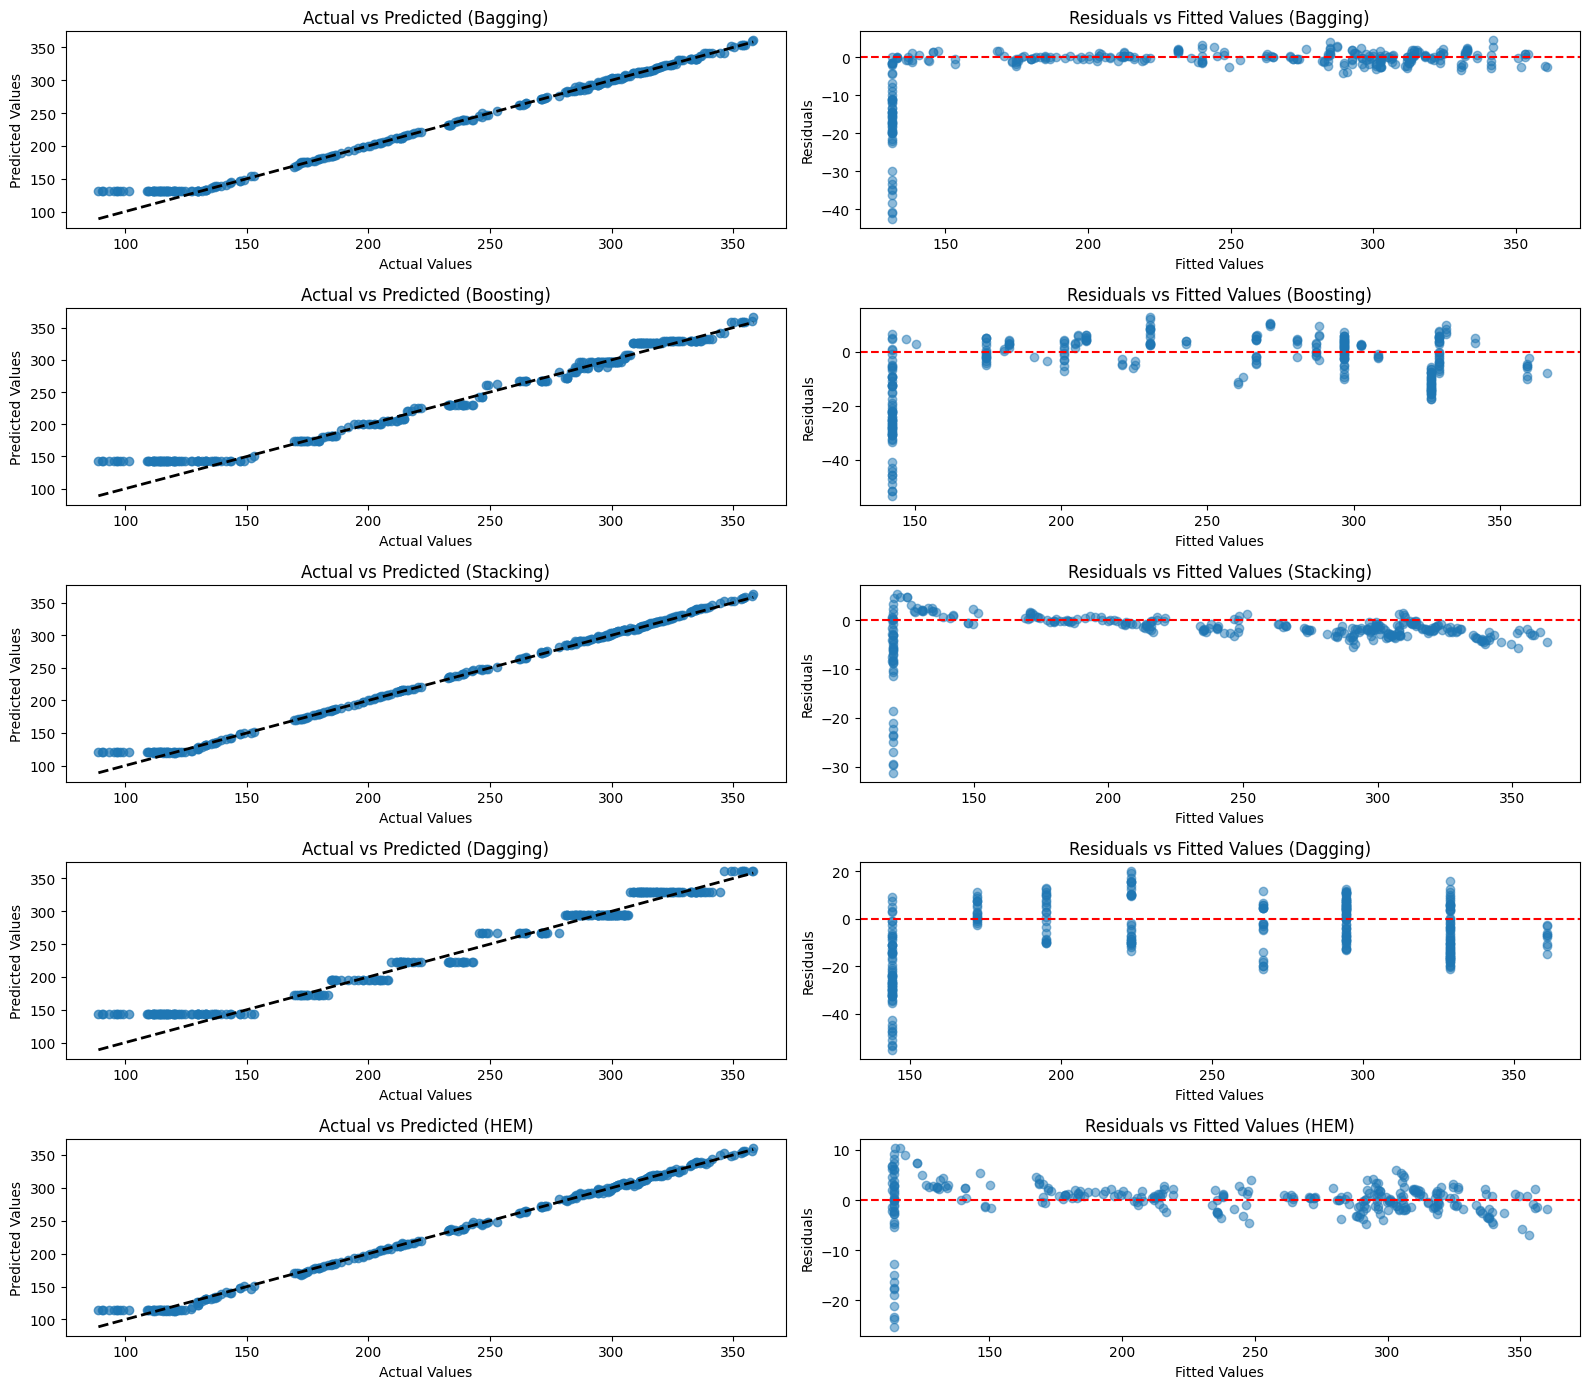

In [ ]:
# Actual vs Predicted and Residuals Plots for Each Model
models = {
    'Bagging': bagging_pred,
    'Boosting': boosting_pred,
    'Stacking': stacking_pred,
    'Dagging': dagging_pred,
    'HEM': final_pred
}

plt.figure(figsize=(16, 14))
for i, (model_name, predictions) in enumerate(models.items(), start=1):
    # Actual vs Predicted
    plt.subplot(5, 2, 2 * i - 1)
    plt.scatter(y_test, predictions, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'Actual vs Predicted ({model_name})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Residuals vs Fitted
    residuals = y_test - predictions
    plt.subplot(5, 2, 2 * i)
    plt.scatter(predictions, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs Fitted Values ({model_name})')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/univariatepred (1).csv')
df2 = pd.read_csv('/content/multivariatepred (1).csv')

In [ ]:
df1

Date      Actual  Bagging_Prediction  Boosting_Prediction  \
0    2022-11-16  113.230003          108.467227           101.876113   
1    2022-11-17  111.449997          110.917307           101.876113   
2    2022-11-18  112.050003          110.535732           103.665472   
3    2022-11-21  109.860001          108.651824           103.665472   
4    2022-11-22  111.440002          107.098244           101.876113   
..          ...         ...                 ...                  ...   
277  2023-12-26  354.829987          351.034993           360.263377   
278  2023-12-27  357.829987          351.034993           360.263377   
279  2023-12-28  358.320007          352.102127           360.263377   
280  2023-12-29  353.959991          355.942830           360.263377   
281  2024-01-02  346.290009          352.244120           360.263377   

     Stacking_Prediction  Dagging_Prediction  Final_Prediction  
0             116.682641          136.255312        117.281561  
1             123.225040          136.255312        118.911946  
2             126.205842          136.255312        119.534685  
3             117.203294          136.255312        117.879086  
4             120.286953          136.255312        117.105288  
..                   ...                 ...               ...  
277           351.329997          360.178086        354.998172  
278           349.754919          360.178086        354.838773  
279           355.333258          360.178086        355.825044  
280           360.165740          360.178086        357.831968  
281           353.245441          360.178086        355.669872  

[282 rows x 7 columns]

In [ ]:
df2

Date      Actual  Bagging_Prediction  Boosting_Prediction  \
0    2022-10-19  133.229996          133.103900           142.351776   
1    2022-10-20  131.529999          131.444661           142.351776   
2    2022-10-21  130.009995          131.444661           142.351776   
3    2022-10-24  129.720001          131.444661           142.351776   
4    2022-10-25  137.509995          138.274894           142.351776   
..          ...         ...                 ...                  ...   
297  2023-12-26  354.829987          354.030209           359.325152   
298  2023-12-27  357.829987          360.076837           360.103439   
299  2023-12-28  358.320007          360.883777           366.181530   
300  2023-12-29  353.959991          353.244872           359.325152   
301  2024-01-02  346.290009          341.842378           341.388587   

     Stacking_Prediction  Dagging_Prediction  Final_Prediction  
0             131.331698          144.128750        131.079089  
1             129.109224          144.128750        128.684020  
2             125.391708          144.128750        122.652747  
3             126.609804          144.128750        124.628978  
4             135.812468          144.128750        134.575666  
..                   ...                 ...               ...  
297           357.999675          360.961298        356.324110  
298           360.201704          360.961298        355.578534  
299           362.923420          360.961298        360.137685  
300           356.698015          360.961298        354.785324  
301           351.951768          360.961298        353.243972  

[302 rows x 7 columns]

In [ ]:
import pandas as pd

# Assuming df1 and df2 are already loaded DataFrames

# Add model type to each
df1['Model_Type'] = 'Univariate'
df2['Model_Type'] = 'Multivariate'

# Concatenate both
df_combined = pd.concat([df1, df2])

# Ensure date format
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# Melt to long format for easier plotting
model_cols = ['Bagging_Prediction', 'Boosting_Prediction', 'Stacking_Prediction', 'Dagging_Prediction', 'Final_Prediction']
df_long = df_combined.melt(
    id_vars=['Date', 'Actual', 'Model_Type'],
    value_vars=model_cols,
    var_name='Model',
    value_name='Prediction'
)

# Clean model names
df_long['Model'] = df_long['Model'].str.replace('_Prediction', '')

# Add residuals and absolute errors
df_long['Residual'] = df_long['Actual'] - df_long['Prediction']
df_long['Abs_Error'] = df_long['Residual'].abs()


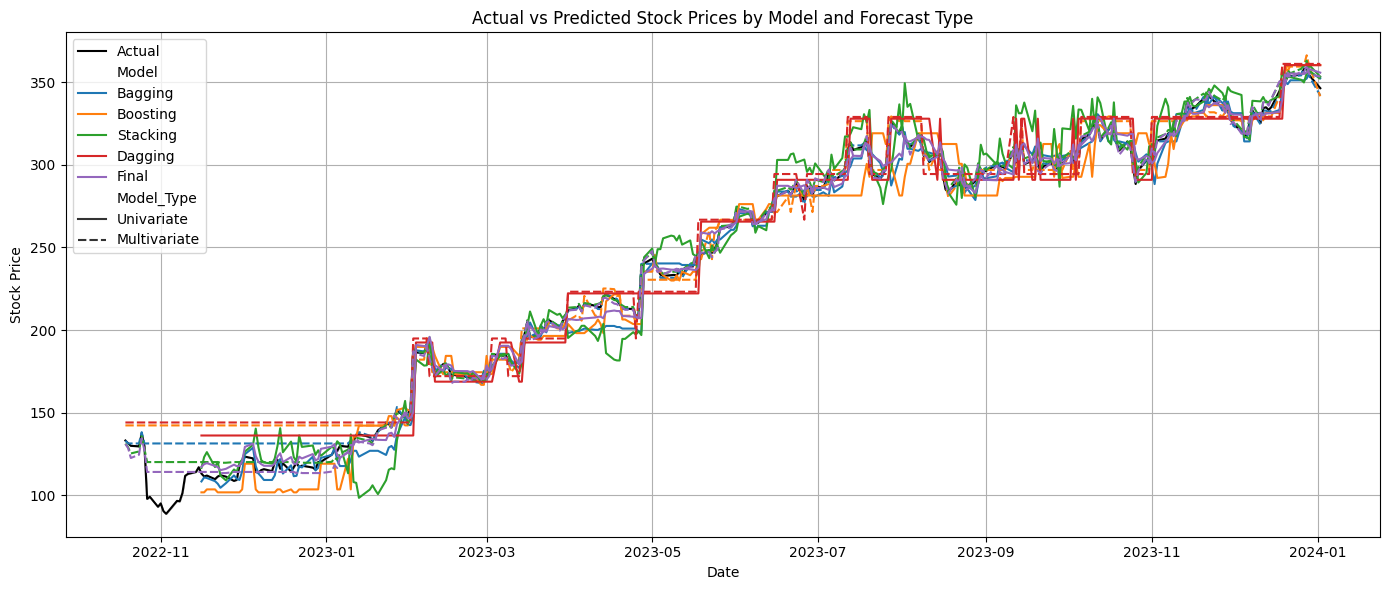

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_long, x='Date', y='Actual', label='Actual', color='black')
sns.lineplot(data=df_long, x='Date', y='Prediction', hue='Model', style='Model_Type')
plt.title('Actual vs Predicted Stock Prices by Model and Forecast Type')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


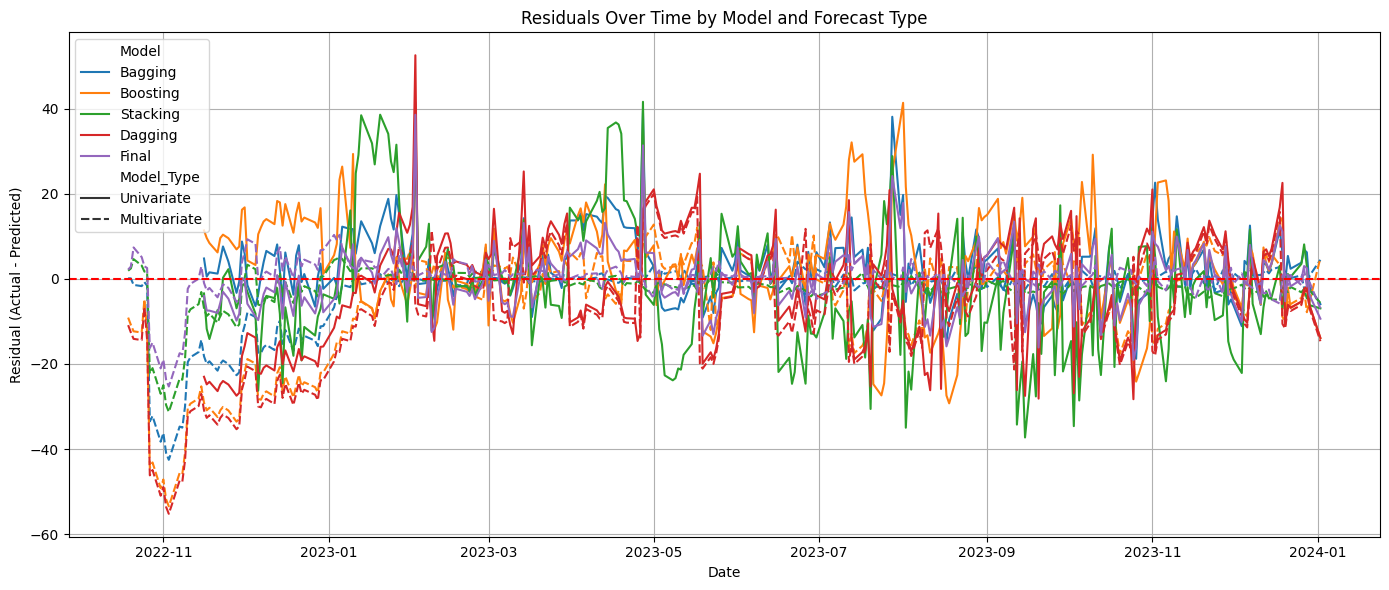

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_long, x='Date', y='Residual', hue='Model', style='Model_Type')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals Over Time by Model and Forecast Type')
plt.xlabel('Date')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_long.rename(columns={'Model_Type': 'Model Type'}, inplace=True)

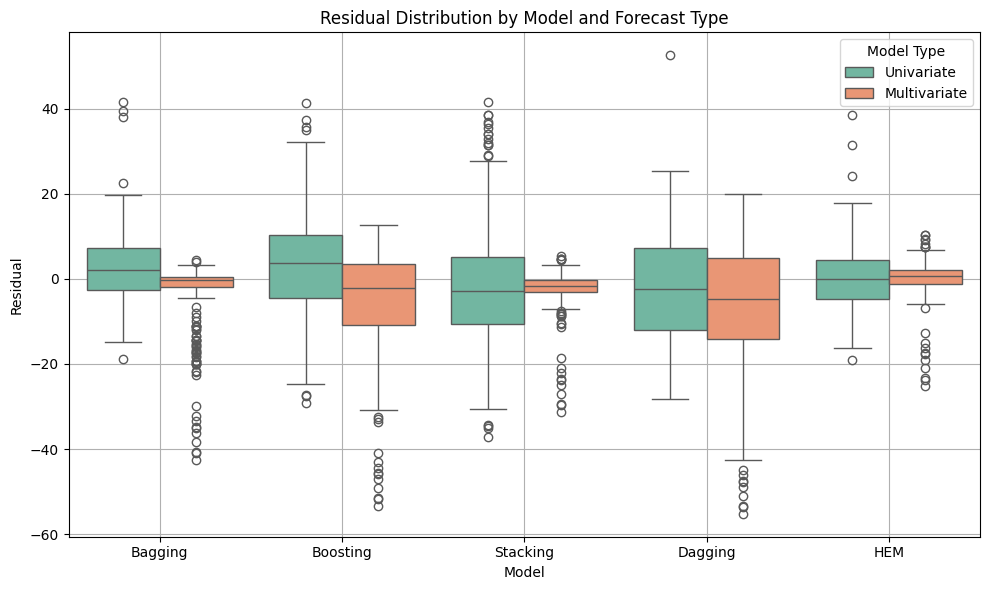

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x='Model', y='Residual', hue='Model Type', palette='Set2')
plt.title('Residual Distribution by Model and Forecast Type')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_long

Date      Actual    Model Type    Model  Prediction  Residual  \
0    2022-11-16  113.230003    Univariate  Bagging  108.467227  4.762776   
1    2022-11-17  111.449997    Univariate  Bagging  110.917307  0.532690   
2    2022-11-18  112.050003    Univariate  Bagging  110.535732  1.514271   
3    2022-11-21  109.860001    Univariate  Bagging  108.651824  1.208177   
4    2022-11-22  111.440002    Univariate  Bagging  107.098244  4.341758   
...         ...         ...           ...      ...         ...       ...   
2915 2023-12-26  354.829987  Multivariate    Final  356.324110 -1.494123   
2916 2023-12-27  357.829987  Multivariate    Final  355.578534  2.251453   
2917 2023-12-28  358.320007  Multivariate    Final  360.137685 -1.817678   
2918 2023-12-29  353.959991  Multivariate    Final  354.785324 -0.825333   
2919 2024-01-02  346.290009  Multivariate    Final  353.243972 -6.953963   

      Abs_Error  Cumulative_Abs_Error  
0      4.762776              4.762776  
1      0.532690              5.295466  
2      1.514271              6.809737  
3      1.208177              8.017914  
4      4.341758             12.359671  
...         ...                   ...  
2915   1.494123            782.534616  
2916   2.251453            784.786069  
2917   1.817678            786.603747  
2918   0.825333            787.429080  
2919   6.953963            794.383043  

[2920 rows x 8 columns]

In [ ]:
df_long['Model'] = df_long['Model'].replace({'Final': 'HEM'})


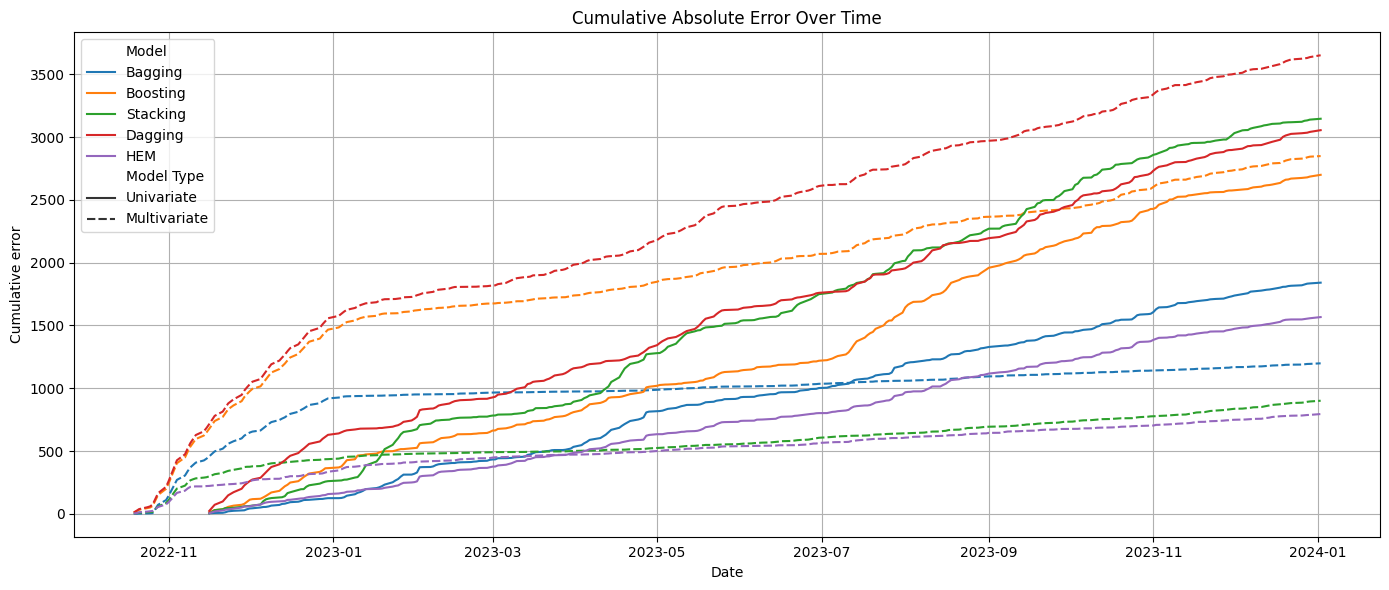

In [ ]:
df_long['Cumulative_Abs_Error'] = df_long.groupby(['Model', 'Model Type'])['Abs_Error'].cumsum()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_long, x='Date', y='Cumulative_Abs_Error', hue='Model', style='Model Type')
plt.title('Cumulative Absolute Error Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative error')
plt.grid(True)
plt.tight_layout()
plt.show()
